In [ ]:
# Import libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import holidays

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
crimes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_crime_clean.csv')

## **Summary Observations**

From our EDA, we saw some limitations to the data set. We deduce that crimes may be committed due to external factors such as weather, social-economic, holidays, etc, which are not available in the data set. 

We featured engineered new features based on available data online, with the assumption that these factors may increase the accuracy to predict crimes rates of individual type.

### **Feature engineering is as follows:**

**From Date feature**
- Time of the day - based on hour count
- Weekend - based on day of the week
- Seasons - based on month

**From Categorical features**
- One hot encode
- Description
- Location Description
- Arrest 
- Domestic 

**External features**
- US holidays
- Unemployment rate
- Weather 
- Population Age


***Note:***

As data is large and computationally heavy, we optimized the dtype to reduce the memory usage allowing us to work seamlessly and efficiently.

### **References:**
- https://datacommons.org/place/geoId/1714000
- https://www.weather.gov/wrh/climate?wfo=lot
- https://www.officeholidays.com/countries/usa/2021


# Data Pre-processing

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263321 entries, 0 to 3263320
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   case_number           object 
 2   date                  object 
 3   block                 object 
 4   iucr                  object 
 5   primary_type          object 
 6   description           object 
 7   location_description  object 
 8   arrest                bool   
 9   domestic              bool   
 10  beat                  int64  
 11  fbi_code              object 
 12  year                  int64  
 13  updated_on            object 
 14  latitude              float64
 15  longitude             float64
 16  location              object 
 17  day                   int64  
 18  month                 int64  
 19  day_of_week           int64  
 20  time                  int64  
 21  geometry              object 
 22  district              int64  
 23  ward   

In [ ]:
crimes.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,fbi_code,year,updated_on,latitude,longitude,location,day,month,day_of_week,time,geometry,district,ward,community_area
0,12260346,JE102126,2021-01-03 13:23:00,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,732,08B,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)",3,1,6,13,POINT (-87.635963997 41.766435144),7,6,68
1,12284355,JE130457,2021-02-02 15:17:00,071XX S SANGAMON ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,RESIDENCE,False,True,733,04B,2021,02/09/2021 03:47:29 PM,41.764526,-87.648037,"(41.764526407, -87.648036798)",2,2,1,15,POINT (-87.64803679799999 41.764526407),7,6,68
2,12264568,JE107021,2021-01-08 15:06:00,070XX S SANGAMON ST,501A,OTHER OFFENSE,ANIMAL ABUSE / NEGLECT,RESIDENCE - PORCH / HALLWAY,False,False,733,26,2021,01/16/2021 03:49:23 PM,41.766363,-87.648087,"(41.766362642, -87.648086903)",8,1,4,15,POINT (-87.64808690299999 41.766362642),7,6,68
3,12264977,JE107479,2021-01-08 22:50:00,066XX S UNION AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,STREET,False,True,723,04B,2021,01/16/2021 03:49:23 PM,41.773108,-87.642633,"(41.773108396, -87.64263345)",8,1,4,22,POINT (-87.64263345000001 41.773108396),7,6,68
4,12264092,JE106496,2021-01-07 23:53:00,067XX S GREEN ST,0453,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,True,False,723,04B,2021,03/26/2021 04:58:11 PM,41.771796,-87.645797,"(41.771796387, -87.645796537)",7,1,3,23,POINT (-87.64579653700001 41.77179638699999),7,6,68


In [ ]:
# Change 'date' dtype to datetime
crimes['date'] = pd.to_datetime(crimes['date'])

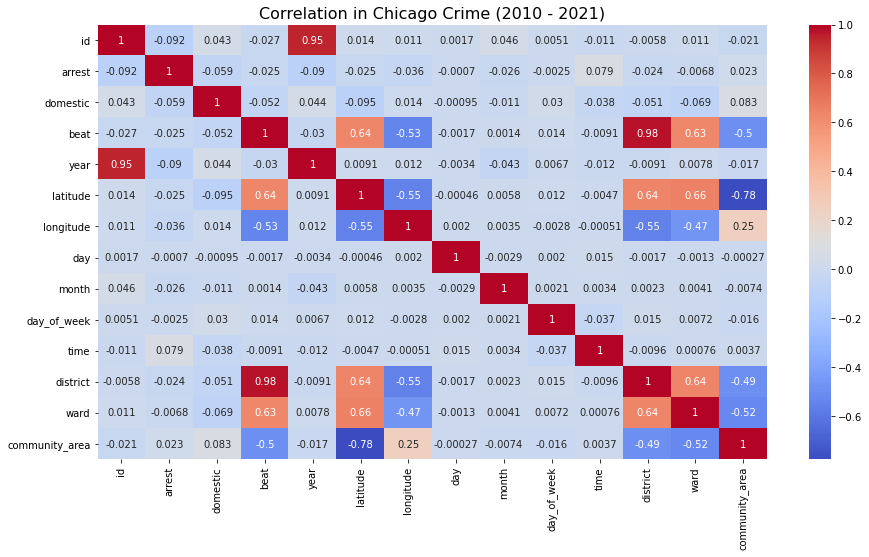

In [ ]:
# Correlation for crime dataset
plt.figure(figsize=(15,8))
sns.heatmap(crimes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation in Chicago Crime (2010 - 2021)', fontsize=16, y=1.05);

In [ ]:
# Save checkpoint
crimes_ori = crimes.copy()

In [ ]:
#crimes = crimes_ori.copy()

In [ ]:
# Filter only use features and drop rest
crimes = crimes[['date', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'year', 'month', 'day', 'day_of_week', 'time', 'district']]

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263321 entries, 0 to 3263320
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   primary_type          object        
 2   description           object        
 3   location_description  object        
 4   arrest                bool          
 5   domestic              bool          
 6   year                  int64         
 7   month                 int64         
 8   day                   int64         
 9   day_of_week           int64         
 10  time                  int64         
 11  district              int64         
dtypes: bool(2), datetime64[ns](1), int64(6), object(3)
memory usage: 255.2+ MB


In [ ]:
crimes.isnull().sum()

date                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
year                    0
month                   0
day                     0
day_of_week             0
time                    0
district                0
dtype: int64

## Filter dataset

Based on top 3 crimes

In [ ]:
# Filter 'theft' crime
theft_df = crimes[crimes['primary_type'] == 'THEFT']

# Filter 'battery' crime
battery_df = crimes[crimes['primary_type'] == 'BATTERY']

# Filter 'criminal damage' crime
criminal_dmg_df = crimes[crimes['primary_type'] == 'CRIMINAL DAMAGE']

## Featured Engineering

**Variables that may affects crime**
- Population density and degree of urbanization.
- Variations in composition of the population, particularly youth concentration.
- Stability of the population with respect to residents’ mobility, commuting patterns, and
transient factors.
- Modes of transportation and highway system.
- Economic conditions, including median income, poverty level, and job availability.
- Cultural factors and educational, recreational, and religious characteristics.
- Family conditions with respect to divorce and family cohesiveness.
- Climate.
- Effective strength of LEAs.
- Administrative and investigative emphases of law enforcement.
- Policies of other components of the criminal justice system (i.e., prosecutorial, judicial,
correctional, and probational).
- Citizens’ attitudes toward crime.
- Crime reporting practices of the citizenry.

**References:**
- https://ucr.fbi.gov/nibrs/2012/resources/variables-affecting-crime#:~:text=The%20transience%20of%20the%20population,and%20comprehending%20the%20crime%20issue.
- https://legalbeagle.com/4572257-do-juveniles-commit-crimes.html

# Theft

## Daily

### Data Summary

In [ ]:
theft_df_ori = theft_df.copy() 

In [ ]:
# Last day of the dataset
theft_df['date'].max()

Timestamp('2021-07-22 23:00:00')

In [ ]:
theft_df.shape

(724602, 12)

In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724602 entries, 9 to 3263319
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  724602 non-null  datetime64[ns]
 1   primary_type          724602 non-null  object        
 2   description           724602 non-null  object        
 3   location_description  724602 non-null  object        
 4   arrest                724602 non-null  bool          
 5   domestic              724602 non-null  bool          
 6   year                  724602 non-null  int64         
 7   month                 724602 non-null  int64         
 8   day                   724602 non-null  int64         
 9   day_of_week           724602 non-null  int64         
 10  time                  724602 non-null  int64         
 11  district              724602 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(6), object(3)
memory

In [ ]:
theft_df.head()

,date,primary_type,description,location_description,arrest,domestic,year,month,day,day_of_week,time,district
9,2021-01-07 16:43:00,THEFT,$500 AND UNDER,APARTMENT,False,False,2021,1,7,3,16,7
12,2021-01-07 15:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,False,2021,1,7,3,15,7
14,2021-01-06 17:30:00,THEFT,$500 AND UNDER,STREET,False,False,2021,1,6,2,17,7
20,2021-01-02 11:38:00,THEFT,$500 AND UNDER,SIDEWALK,False,False,2021,1,2,5,11,7
36,2021-01-02 20:30:00,THEFT,$500 AND UNDER,TAVERN / LIQUOR STORE,False,False,2021,1,2,5,20,7


In [ ]:
# sort date and reset index
theft_df = theft_df.sort_values(by='date')
theft_df = theft_df.reset_index(drop=True)

In [ ]:
# Save checkpoint
theft_df_summary = theft_df.copy()

### Categorical - Time
- Assigning category - time of the day based on the hour count

In [ ]:
#test_df['time'] = test_df['date'].apply(lambda x: x.strftime("%H")).astype(int)

In [ ]:
# Function to set 0 and 1 for range of values 
def time_of_day(row_df):
    if row_df < 6 :
      time = 'night'
    elif 6 <= row_df < 12:   
      time = 'morning'
    elif 12 <= row_df < 18:   
      time = 'afternoon'
    elif 18 <= row_df:   
      time = 'evening'
    else:
        raise ValueError(f'Invalid hour: {row_df}')
        
    return time

In [ ]:
# Assign values 1 and 0 to 'time_day'
def time_check(df):
  df['time_day'] = df.apply(lambda row: time_of_day(row_df = row['time']), axis=1)

In [ ]:
# Assign new values for time of the day
time_check(theft_df)

In [ ]:
theft_df_time = theft_df.copy()

### One Hot Encoding - Description, Location Description, Arrest, Domestic & Time
- For every categorical features, the values will be dummify

In [ ]:
len(theft_df)

724602

In [ ]:
time_day = pd.get_dummies(theft_df['time_day'])
time_day.head()

,afternoon,evening,morning,night
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
time_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   afternoon  724602 non-null  uint8
 1   evening    724602 non-null  uint8
 2   morning    724602 non-null  uint8
 3   night      724602 non-null  uint8
dtypes: uint8(4)
memory usage: 2.8 MB


In [ ]:
# Top 5 causes of 'theft'
#theft_df['description'].value_counts().head()

In [ ]:
# One hot encoding 'desciption' columns
description = pd.get_dummies(theft_df['description'])
description.head()

,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   $500 AND UNDER                        724602 non-null  uint8
 1   AGG: FINANCIAL ID THEFT               724602 non-null  uint8
 2   ATTEMPT FINANCIAL IDENTITY THEFT      724602 non-null  uint8
 3   ATTEMPT THEFT                         724602 non-null  uint8
 4   DELIVERY CONTAINER THEFT              724602 non-null  uint8
 5   FINANCIAL ID THEFT: OVER $300         724602 non-null  uint8
 6   FINANCIAL ID THEFT:$300 &UNDER        724602 non-null  uint8
 7   FINANCIAL IDENTITY THEFT: OVER $300   724602 non-null  uint8
 8   FROM BUILDING                         724602 non-null  uint8
 9   FROM COIN-OP MACHINE/DEVICE           724602 non-null  uint8
 10  FROM COIN-OPERATED MACHINE OR DEVICE  724602 non-null  uint8
 11  OVER $500                 

In [ ]:
# One hot encoding 'location_desciption' columns
location_description = pd.get_dummies(theft_df['location_description'])
location_description.head()

,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BOAT / WATERCRAFT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA HALLWAY / STAIRWELL / ELEVATOR,CHA HALLWAY/STAIRWELL/ELEVATOR,CHA PARKING LOT / GROUNDS,CHA PARKING LOT/GROUNDS,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,CLEANING STORE,COIN OPERATED MACHINE,...,POOL ROOM,RESIDENCE,RESIDENCE - GARAGE,RESIDENCE - PORCH / HALLWAY,RESIDENCE - YARD (FRONT / BACK),RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SAVINGS AND LOAN,SCHOOL - PRIVATE BUILDING,SCHOOL - PRIVATE GROUNDS,SCHOOL - PUBLIC BUILDING,SCHOOL - PUBLIC GROUNDS,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
location_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Columns: 142 entries, ABANDONED BUILDING to WAREHOUSE
dtypes: uint8(142)
memory usage: 98.1 MB


In [ ]:
location_description.columns.value_counts()

AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA           1
BANK                                                     1
CREDIT UNION                                             1
VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)    1
POLICE FACILITY / VEHICLE PARKING LOT                    1
CHA HALLWAY / STAIRWELL / ELEVATOR                       1
VACANT LOT / LAND                                        1
SCHOOL, PUBLIC, GROUNDS                                  1
POOL ROOM                                                1
CTA BUS                                                  1
APPLIANCE STORE                                          1
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA             1
VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS             1
CTA BUS STOP                                             1
PAWN SHOP                                                1
VEHICLE-COMMERCIAL                                       1
HOTEL / MOTEL                                           

In [ ]:
# One hot encoding 'arrest' columns
arrest = pd.get_dummies(theft_df['arrest'], drop_first=True, prefix='arrest')
arrest.head()

,arrest_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
domestic = pd.get_dummies(theft_df['domestic'], drop_first=True, prefix='domestic')
domestic.head()

,domestic_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
district = pd.get_dummies(theft_df['district'], drop_first=True, prefix='district')
district.head()

,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Combine all one hot encoding with theft_df
dummies_list = [time_day, description, location_description, arrest, domestic, district]

for dummies in dummies_list:
  theft_df = pd.concat([theft_df, dummies], axis=1)

In [ ]:
theft_df = theft_df.drop(columns=['description', 'location_description', 'arrest', 'domestic', 'district', 'time_day'])
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Columns: 192 entries, date to district_25
dtypes: datetime64[ns](1), int64(5), object(1), uint8(185)
memory usage: 166.5+ MB


In [ ]:
theft_df_encode = theft_df.copy()

### Group By (Daily)
- Each features holds different weight in data set 
- As there are mulitple dates of the same day, we will combine them into 1, where some features are treated as count() and the rest as sum()

In [ ]:
theft_df.shape

(724602, 192)

In [ ]:
# Remove 'date' features to allow proper consolidation of features (add on after combining)
theft_df = theft_df.drop(['year', 'month', 'day', 'day_of_week', 'time'], axis=1)

In [ ]:
# Remove time factor in 'date'
theft_df['date'] = theft_df['date'].dt.date

# Rechange 'date' dtype to datetime
theft_df['date'] = pd.to_datetime(theft_df['date'])

Count Features

In [ ]:
# Features to count()
test_count = theft_df[['date', 'primary_type']]

# Groupby 'date'
test_count = test_count.groupby('date').count().sort_index()
test_count.reset_index(inplace=True)

Sum Features

In [ ]:
# Features to sum()
test_sum = theft_df.drop('primary_type', axis=1)

# Groupby 'date'
test_sum = test_sum.groupby('date').sum().sort_index()
test_sum.reset_index(inplace=True)

Combine both features to original dataset

In [ ]:
theft_df = test_count.merge(test_sum, how='left', on='date')
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,2010-01-01,332,69,23,109,131,36,6,2,2,0,129,43,0,54,0,0,31,9,7,13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,47,...,0,0,0,0,2,0,0,0,0,0,0,0,2,1,0,0,1,11,7,8,16,17,8,14,18,21,16,16,13,16,21,11,11,10,28,12,8,11,12,33
1,2010-01-02,182,77,56,26,23,56,0,0,1,0,6,5,0,42,0,0,34,10,3,25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,17,...,0,2,1,0,1,0,0,0,0,0,0,0,2,1,0,0,0,14,5,5,12,4,6,10,7,6,6,2,6,19,12,3,6,6,16,17,7,4,4,11
2,2010-01-03,146,58,29,19,40,40,0,0,2,0,1,1,0,25,0,0,48,6,1,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,12,...,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,15,5,12,2,5,3,5,3,13,6,8,2,10,10,0,2,5,16,13,3,6,2,7
3,2010-01-04,195,77,47,51,20,50,1,3,1,1,10,3,0,46,0,0,50,9,4,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,9,...,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,19,5,7,6,9,5,5,7,16,10,10,6,17,13,4,4,4,23,17,3,1,5,10
4,2010-01-05,206,81,44,60,21,61,0,2,3,0,12,3,0,43,0,0,46,3,1,32,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,1,0,12,...,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,32,4,15,7,8,4,10,9,21,8,6,4,14,9,7,11,6,14,14,1,2,9,15


In [ ]:
theft_df_groupby = theft_df.copy()

### Future Dates
- Assigning future values for the Time-Series SARIMAX model

In [ ]:
# Creating future date
future_dates = pd.date_range(start='07/23/2021', end='07/31/2022', freq='D')
future_dates

DatetimeIndex(['2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-07-31', '2021-08-01',
               ...
               '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25',
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-07-30', '2022-07-31'],
              dtype='datetime64[ns]', length=374, freq='D')

In [ ]:
# Assign dates to datafram and change column name
future_dates = pd.DataFrame(future_dates) 
future_dates.columns = ['date']
future_dates.head()

,date
0,2021-07-23
1,2021-07-24
2,2021-07-25
3,2021-07-26
4,2021-07-27


In [ ]:
# Rechange 'date' dtype to datetime
future_dates['date'] = pd.to_datetime(future_dates['date'])

# Remove time factor in 'date'
future_dates['date'] = future_dates['date'].dt.date

# Rechange 'date' dtype to datetime
future_dates['date'] = pd.to_datetime(future_dates['date'])

In [ ]:
future_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    374 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [ ]:
# Combining futures dates with current dataset
theft_df = pd.concat([theft_df, future_dates], axis=0)
theft_df.reset_index(drop=True, inplace=True)

In [ ]:
theft_df_future = theft_df.copy()

### Re-assign Features - Date
- Assign date features such as day, month, year and day of the week


In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
theft_df['day'] = theft_df['date'].apply(lambda x: x.day)
theft_df['month'] = theft_df['date'].apply(lambda x: x.month)
theft_df['year'] = theft_df['date'].apply(lambda x: x.year)
theft_df['day_of_week'] = theft_df['date'].apply(lambda x: x.dayofweek)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week
0,2010-01-01,332.0,69.0,23.0,109.0,131.0,36.0,6.0,2.0,2.0,0.0,129.0,43.0,0.0,54.0,0.0,0.0,31.0,9.0,7.0,13.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,11.0,7.0,8.0,16.0,17.0,8.0,14.0,18.0,21.0,16.0,16.0,13.0,16.0,21.0,11.0,11.0,10.0,28.0,12.0,8.0,11.0,12.0,33.0,1,1,2010,4
1,2010-01-02,182.0,77.0,56.0,26.0,23.0,56.0,0.0,0.0,1.0,0.0,6.0,5.0,0.0,42.0,0.0,0.0,34.0,10.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,14.0,5.0,5.0,12.0,4.0,6.0,10.0,7.0,6.0,6.0,2.0,6.0,19.0,12.0,3.0,6.0,6.0,16.0,17.0,7.0,4.0,4.0,11.0,2,1,2010,5
2,2010-01-03,146.0,58.0,29.0,19.0,40.0,40.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,25.0,0.0,0.0,48.0,6.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,15.0,5.0,12.0,2.0,5.0,3.0,5.0,3.0,13.0,6.0,8.0,2.0,10.0,10.0,0.0,2.0,5.0,16.0,13.0,3.0,6.0,2.0,7.0,3,1,2010,6
3,2010-01-04,195.0,77.0,47.0,51.0,20.0,50.0,1.0,3.0,1.0,1.0,10.0,3.0,0.0,46.0,0.0,0.0,50.0,9.0,4.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,7.0,6.0,9.0,5.0,5.0,7.0,16.0,10.0,10.0,6.0,17.0,13.0,4.0,4.0,4.0,23.0,17.0,3.0,1.0,5.0,10.0,4,1,2010,0
4,2010-01-05,206.0,81.0,44.0,60.0,21.0,61.0,0.0,2.0,3.0,0.0,12.0,3.0,0.0,43.0,0.0,0.0,46.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,32.0,4.0,15.0,7.0,8.0,4.0,10.0,9.0,21.0,8.0,6.0,4.0,14.0,9.0,7.0,11.0,6.0,14.0,14.0,1.0,2.0,9.0,15.0,5,1,2010,1


In [ ]:
theft_df_date = theft_df.copy()

### Categorical - Date
- Assigning weekend based on day of the week and seasons based on month

Weekend

In [ ]:
# Function to assign 1 for range(4-7) and 0 for range(0-3)
def is_weekend(row_df):
    if row_df >= 4:
      weekend = 1
    elif row_df < 4:
      weekend = 0
    else:
        raise ValueError(f'Invalid hour: {row_df}')
    return weekend

In [ ]:
# Assign values 1 and 0 to 'weekend'
def weekend(df):
  df['isweekend'] = df.apply(lambda row: is_weekend(row_df = row['day_of_week']), axis=1)

In [ ]:
weekend(theft_df)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend
0,2010-01-01,332.0,69.0,23.0,109.0,131.0,36.0,6.0,2.0,2.0,0.0,129.0,43.0,0.0,54.0,0.0,0.0,31.0,9.0,7.0,13.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,11.0,7.0,8.0,16.0,17.0,8.0,14.0,18.0,21.0,16.0,16.0,13.0,16.0,21.0,11.0,11.0,10.0,28.0,12.0,8.0,11.0,12.0,33.0,1,1,2010,4,1
1,2010-01-02,182.0,77.0,56.0,26.0,23.0,56.0,0.0,0.0,1.0,0.0,6.0,5.0,0.0,42.0,0.0,0.0,34.0,10.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,14.0,5.0,5.0,12.0,4.0,6.0,10.0,7.0,6.0,6.0,2.0,6.0,19.0,12.0,3.0,6.0,6.0,16.0,17.0,7.0,4.0,4.0,11.0,2,1,2010,5,1
2,2010-01-03,146.0,58.0,29.0,19.0,40.0,40.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,25.0,0.0,0.0,48.0,6.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,15.0,5.0,12.0,2.0,5.0,3.0,5.0,3.0,13.0,6.0,8.0,2.0,10.0,10.0,0.0,2.0,5.0,16.0,13.0,3.0,6.0,2.0,7.0,3,1,2010,6,1
3,2010-01-04,195.0,77.0,47.0,51.0,20.0,50.0,1.0,3.0,1.0,1.0,10.0,3.0,0.0,46.0,0.0,0.0,50.0,9.0,4.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,7.0,6.0,9.0,5.0,5.0,7.0,16.0,10.0,10.0,6.0,17.0,13.0,4.0,4.0,4.0,23.0,17.0,3.0,1.0,5.0,10.0,4,1,2010,0,0
4,2010-01-05,206.0,81.0,44.0,60.0,21.0,61.0,0.0,2.0,3.0,0.0,12.0,3.0,0.0,43.0,0.0,0.0,46.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,32.0,4.0,15.0,7.0,8.0,4.0,10.0,9.0,21.0,8.0,6.0,4.0,14.0,9.0,7.0,11.0,6.0,14.0,14.0,1.0,2.0,9.0,15.0,5,1,2010,1,0


Seasons

In [ ]:
# Function to determine season based on month
def type_season(row_df):
    if 1 <= row_df < 3 or row_df == 12:
        season = 'winter'
    elif 3 <= row_df < 6:
        season = 'spring'
    elif 6 <= row_df < 9:
        season = 'summer'
    elif 9 <= row_df < 12:
        season = 'autumn'
    else:
        raise ValueError(f'Invalid hour: {row_df}')
    return season

In [ ]:
# Assign types of season in 'season'
def season(df):
  df['seasons'] = df.apply(lambda row: type_season(row_df = row['month']), axis=1)

In [ ]:
season(theft_df)

In [ ]:
# One hot encoding - 'seasons'
seasons = pd.get_dummies(theft_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
theft_df = pd.concat([theft_df, seasons],  axis=1)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend,seasons,autumn,spring,summer,winter
0,2010-01-01,332.0,69.0,23.0,109.0,131.0,36.0,6.0,2.0,2.0,0.0,129.0,43.0,0.0,54.0,0.0,0.0,31.0,9.0,7.0,13.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,...,0.0,0.0,2.0,1.0,0.0,0.0,1.0,11.0,7.0,8.0,16.0,17.0,8.0,14.0,18.0,21.0,16.0,16.0,13.0,16.0,21.0,11.0,11.0,10.0,28.0,12.0,8.0,11.0,12.0,33.0,1,1,2010,4,1,winter,0,0,0,1
1,2010-01-02,182.0,77.0,56.0,26.0,23.0,56.0,0.0,0.0,1.0,0.0,6.0,5.0,0.0,42.0,0.0,0.0,34.0,10.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,14.0,5.0,5.0,12.0,4.0,6.0,10.0,7.0,6.0,6.0,2.0,6.0,19.0,12.0,3.0,6.0,6.0,16.0,17.0,7.0,4.0,4.0,11.0,2,1,2010,5,1,winter,0,0,0,1
2,2010-01-03,146.0,58.0,29.0,19.0,40.0,40.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,25.0,0.0,0.0,48.0,6.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,15.0,5.0,12.0,2.0,5.0,3.0,5.0,3.0,13.0,6.0,8.0,2.0,10.0,10.0,0.0,2.0,5.0,16.0,13.0,3.0,6.0,2.0,7.0,3,1,2010,6,1,winter,0,0,0,1
3,2010-01-04,195.0,77.0,47.0,51.0,20.0,50.0,1.0,3.0,1.0,1.0,10.0,3.0,0.0,46.0,0.0,0.0,50.0,9.0,4.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,7.0,6.0,9.0,5.0,5.0,7.0,16.0,10.0,10.0,6.0,17.0,13.0,4.0,4.0,4.0,23.0,17.0,3.0,1.0,5.0,10.0,4,1,2010,0,0,winter,0,0,0,1
4,2010-01-05,206.0,81.0,44.0,60.0,21.0,61.0,0.0,2.0,3.0,0.0,12.0,3.0,0.0,43.0,0.0,0.0,46.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,12.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,32.0,4.0,15.0,7.0,8.0,4.0,10.0,9.0,21.0,8.0,6.0,4.0,14.0,9.0,7.0,11.0,6.0,14.0,14.0,1.0,2.0,9.0,15.0,5,1,2010,1,0,winter,0,0,0,1


In [ ]:
theft_df = theft_df.drop(columns=['seasons'])

In [ ]:
theft_df_date = theft_df.copy()

### New features - US Holidays, Unemployment Rate, Temperature & Population
- Introduction of new features based on domain knowledge that could potentially increase the accuracy of crime

US Public Holidays

In [ ]:
# Create list of years 2010 - 2022
list_of_years = np.arange(2010, 2023).tolist()

# Store US public holiday from year 2010 - 2022
us_holidays = []

# Retrieve holiday
for year in list_of_years:
  for date in holidays.UnitedStates(years=year).items():
    us_holidays.append(str(date[0]))

In [ ]:
# Check US holidays dates till 2022
print (us_holidays)
print (f'Total holidays: {len(us_holidays)}')

['2010-01-01', '2010-12-31', '2010-01-18', '2010-02-15', '2010-05-31', '2010-07-04', '2010-07-05', '2010-09-06', '2010-10-11', '2010-11-11', '2010-11-25', '2010-12-25', '2010-12-24', '2011-01-01', '2010-12-31', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26', '2012-01-01', '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-12', '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-04', '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18', '2016-02-15', '2016

In [ ]:
theft_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in theft_df['date']]

Unemployment Rate

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date'] = pd.to_datetime(unemployment['date'])

In [ ]:
# Merged theft data with unemployment data
theft_df = pd.merge(theft_df, unemployment, how='left', on='date')

# Using bfill and ffill for unavailable datas
theft_df['unemployment_rate'] = theft_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

Temperature

In [ ]:
# Load weather dataset
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/weather_chicago.csv')

# Require only 2 features
weather = weather[['date', 'avg_temp']]

# Check date dtype to datetime
weather['date'] = pd.to_datetime(weather['date'])

In [ ]:
# Merged theft data with weather data
theft_df = pd.merge(theft_df, weather, how='left', on='date')
theft_df.fillna(round(theft_df['avg_temp'].mean(), 1), inplace=True)

Population Age

In [ ]:
# Load population dataset
age = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/population_age.csv')

In [ ]:
# Merged theft data with population data
theft_df = pd.merge(theft_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  theft_df[age_range] = theft_df[age_range].bfill(axis='rows')
  theft_df[age_range] = theft_df[age_range].ffill(axis='rows')
  theft_df[age_range] = theft_df[age_range].astype(int)

In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4594
Columns: 206 entries, date to 75andmore
dtypes: datetime64[ns](1), float64(188), int64(13), uint8(4)
memory usage: 7.1 MB


In [ ]:
# Save checkpoint
theft_df_new = theft_df.copy()

### Save Dataset

In [ ]:
# Change dtype to int
for feature in theft_df.columns:
  if feature == 'avg_temp' or feature == 'unemployment_rate':
    continue
  else:
    if theft_df[feature].dtype == 'float64':
      theft_df[feature] = theft_df[feature].astype('int64')
    else:
      continue

In [ ]:
# Lower caps for all data columns
theft_df.columns = theft_df.columns.str.lower()

In [ ]:
theft_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_theft_daily.csv', index=False)

## Monthly

In [ ]:
# Load dataset from daily
theft_df = theft_df_future.copy()

#### Note: 
- For monthly, holidays and weekends features have to be created first their weights in monthly calculation
- All other features are similar to daily data

### Required Features


US Public Holidays

In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Columns: 187 entries, date to district_25
dtypes: datetime64[ns](1), float64(186)
memory usage: 6.6 MB


In [ ]:
# Use function load earlier
theft_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in theft_df['date']]

Weekend

In [ ]:
# Create new columns for day_of_week'
theft_df['day_of_week'] = theft_df['date'].apply(lambda x: x.dayofweek)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,day_of_week
0,2010-01-01,332.0,69.0,23.0,109.0,131.0,36.0,6.0,2.0,2.0,0.0,129.0,43.0,0.0,54.0,0.0,0.0,31.0,9.0,7.0,13.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,11.0,7.0,8.0,16.0,17.0,8.0,14.0,18.0,21.0,16.0,16.0,13.0,16.0,21.0,11.0,11.0,10.0,28.0,12.0,8.0,11.0,12.0,33.0,1,4
1,2010-01-02,182.0,77.0,56.0,26.0,23.0,56.0,0.0,0.0,1.0,0.0,6.0,5.0,0.0,42.0,0.0,0.0,34.0,10.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,14.0,5.0,5.0,12.0,4.0,6.0,10.0,7.0,6.0,6.0,2.0,6.0,19.0,12.0,3.0,6.0,6.0,16.0,17.0,7.0,4.0,4.0,11.0,0,5
2,2010-01-03,146.0,58.0,29.0,19.0,40.0,40.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,25.0,0.0,0.0,48.0,6.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,15.0,5.0,12.0,2.0,5.0,3.0,5.0,3.0,13.0,6.0,8.0,2.0,10.0,10.0,0.0,2.0,5.0,16.0,13.0,3.0,6.0,2.0,7.0,0,6
3,2010-01-04,195.0,77.0,47.0,51.0,20.0,50.0,1.0,3.0,1.0,1.0,10.0,3.0,0.0,46.0,0.0,0.0,50.0,9.0,4.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,9.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,7.0,6.0,9.0,5.0,5.0,7.0,16.0,10.0,10.0,6.0,17.0,13.0,4.0,4.0,4.0,23.0,17.0,3.0,1.0,5.0,10.0,0,0
4,2010-01-05,206.0,81.0,44.0,60.0,21.0,61.0,0.0,2.0,3.0,0.0,12.0,3.0,0.0,43.0,0.0,0.0,46.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,32.0,4.0,15.0,7.0,8.0,4.0,10.0,9.0,21.0,8.0,6.0,4.0,14.0,9.0,7.0,11.0,6.0,14.0,14.0,1.0,2.0,9.0,15.0,0,1


In [ ]:
# Use function load earlier
weekend(theft_df)

In [ ]:
theft_df = theft_df.drop('day_of_week', axis=1)

### Group By (Monthly)

In [ ]:
theft_df.set_index('date', inplace=True)
theft_df.head()

,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,...,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,332.0,69.0,23.0,109.0,131.0,36.0,6.0,2.0,2.0,0.0,129.0,43.0,0.0,54.0,0.0,0.0,31.0,9.0,7.0,13.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,11.0,7.0,8.0,16.0,17.0,8.0,14.0,18.0,21.0,16.0,16.0,13.0,16.0,21.0,11.0,11.0,10.0,28.0,12.0,8.0,11.0,12.0,33.0,1,1
2010-01-02,182.0,77.0,56.0,26.0,23.0,56.0,0.0,0.0,1.0,0.0,6.0,5.0,0.0,42.0,0.0,0.0,34.0,10.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,14.0,5.0,5.0,12.0,4.0,6.0,10.0,7.0,6.0,6.0,2.0,6.0,19.0,12.0,3.0,6.0,6.0,16.0,17.0,7.0,4.0,4.0,11.0,0,1
2010-01-03,146.0,58.0,29.0,19.0,40.0,40.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,25.0,0.0,0.0,48.0,6.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,15.0,5.0,12.0,2.0,5.0,3.0,5.0,3.0,13.0,6.0,8.0,2.0,10.0,10.0,0.0,2.0,5.0,16.0,13.0,3.0,6.0,2.0,7.0,0,1
2010-01-04,195.0,77.0,47.0,51.0,20.0,50.0,1.0,3.0,1.0,1.0,10.0,3.0,0.0,46.0,0.0,0.0,50.0,9.0,4.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,7.0,6.0,9.0,5.0,5.0,7.0,16.0,10.0,10.0,6.0,17.0,13.0,4.0,4.0,4.0,23.0,17.0,3.0,1.0,5.0,10.0,0,0
2010-01-05,206.0,81.0,44.0,60.0,21.0,61.0,0.0,2.0,3.0,0.0,12.0,3.0,0.0,43.0,0.0,0.0,46.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,32.0,4.0,15.0,7.0,8.0,4.0,10.0,9.0,21.0,8.0,6.0,4.0,14.0,9.0,7.0,11.0,6.0,14.0,14.0,1.0,2.0,9.0,15.0,0,0


In [ ]:
# Resample theft rate to monthly count
theft_df = theft_df.resample('M').sum()
theft_df.reset_index(inplace=True)

In [ ]:
theft_df_groupbym = theft_df.copy()

### Re-assign Features - Date & Seasons


Dates

In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
theft_df['month'] = theft_df['date'].apply(lambda x: x.month)
theft_df['year'] = theft_df['date'].apply(lambda x: x.year)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend,month,year
0,2010-01-31,6038.0,2244.0,1496.0,1413.0,885.0,1736.0,18.0,25.0,61.0,4.0,356.0,134.0,0.0,1154.0,1.0,0.0,1423.0,190.0,91.0,845.0,0.0,9.0,1.0,2.0,1.0,3.0,0.0,2.0,2.0,5.0,0.0,1.0,9.0,0.0,1.0,7.0,55.0,2.0,325.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,18.0,0.0,0.0,9.0,761.0,139.0,238.0,224.0,275.0,180.0,272.0,263.0,406.0,267.0,174.0,234.0,427.0,317.0,138.0,194.0,208.0,491.0,411.0,119.0,185.0,169.0,376.0,2,15,1,2010
1,2010-02-28,4781.0,1889.0,1159.0,1101.0,632.0,1382.0,21.0,32.0,34.0,5.0,256.0,93.0,0.0,982.0,2.0,0.0,1170.0,116.0,36.0,652.0,0.0,9.0,0.0,2.0,1.0,0.0,3.0,2.0,2.0,2.0,0.0,3.0,8.0,0.0,1.0,1.0,39.0,2.0,275.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,19.0,0.0,0.0,8.0,595.0,146.0,206.0,169.0,214.0,162.0,212.0,211.0,318.0,224.0,142.0,179.0,275.0,249.0,125.0,163.0,173.0,397.0,322.0,93.0,149.0,143.0,247.0,1,12,2,2010
2,2010-03-31,6049.0,2283.0,1587.0,1345.0,834.0,1838.0,29.0,26.0,49.0,3.0,253.0,101.0,0.0,1155.0,6.0,0.0,1577.0,153.0,63.0,796.0,0.0,21.0,3.0,5.0,1.0,1.0,1.0,4.0,7.0,4.0,1.0,9.0,3.0,0.0,0.0,2.0,61.0,2.0,279.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,10.0,0.0,0.0,16.0,727.0,132.0,242.0,230.0,232.0,166.0,264.0,255.0,386.0,293.0,172.0,204.0,409.0,362.0,124.0,211.0,216.0,498.0,460.0,109.0,201.0,198.0,336.0,0,12,3,2010
3,2010-04-30,6102.0,2237.0,1611.0,1404.0,850.0,1917.0,19.0,30.0,48.0,1.0,235.0,87.0,0.0,1018.0,2.0,0.0,1719.0,147.0,68.0,811.0,0.0,9.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,3.0,3.0,1.0,9.0,1.0,0.0,2.0,73.0,1.0,271.0,...,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,16.0,0.0,0.0,12.0,649.0,144.0,253.0,226.0,256.0,168.0,301.0,241.0,383.0,267.0,201.0,219.0,394.0,330.0,137.0,228.0,227.0,533.0,459.0,122.0,193.0,186.0,336.0,0,13,4,2010
4,2010-05-31,6684.0,2466.0,1801.0,1471.0,946.0,2133.0,9.0,19.0,67.0,1.0,190.0,88.0,0.0,1257.0,4.0,0.0,1895.0,153.0,68.0,800.0,0.0,16.0,3.0,0.0,2.0,1.0,0.0,1.0,4.0,4.0,1.0,5.0,5.0,0.0,3.0,2.0,92.0,0.0,278.0,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,12.0,0.0,0.0,8.0,631.0,145.0,278.0,238.0,309.0,207.0,298.0,230.0,367.0,275.0,205.0,251.0,486.0,373.0,132.0,217.0,224.0,623.0,564.0,125.0,212.0,232.0,361.0,1,14,5,2010


Seasons

In [ ]:
# Use function load earlier
season(theft_df)

In [ ]:
# One hot encode season based on months
seasons = pd.get_dummies(theft_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
# Merged with theft_df
theft_df = pd.concat([theft_df, seasons], axis=1)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend,month,year,seasons,autumn,spring,summer,winter
0,2010-01-31,6038.0,2244.0,1496.0,1413.0,885.0,1736.0,18.0,25.0,61.0,4.0,356.0,134.0,0.0,1154.0,1.0,0.0,1423.0,190.0,91.0,845.0,0.0,9.0,1.0,2.0,1.0,3.0,0.0,2.0,2.0,5.0,0.0,1.0,9.0,0.0,1.0,7.0,55.0,2.0,325.0,...,0.0,0.0,0.0,128.0,18.0,0.0,0.0,9.0,761.0,139.0,238.0,224.0,275.0,180.0,272.0,263.0,406.0,267.0,174.0,234.0,427.0,317.0,138.0,194.0,208.0,491.0,411.0,119.0,185.0,169.0,376.0,2,15,1,2010,winter,0,0,0,1
1,2010-02-28,4781.0,1889.0,1159.0,1101.0,632.0,1382.0,21.0,32.0,34.0,5.0,256.0,93.0,0.0,982.0,2.0,0.0,1170.0,116.0,36.0,652.0,0.0,9.0,0.0,2.0,1.0,0.0,3.0,2.0,2.0,2.0,0.0,3.0,8.0,0.0,1.0,1.0,39.0,2.0,275.0,...,0.0,0.0,0.0,120.0,19.0,0.0,0.0,8.0,595.0,146.0,206.0,169.0,214.0,162.0,212.0,211.0,318.0,224.0,142.0,179.0,275.0,249.0,125.0,163.0,173.0,397.0,322.0,93.0,149.0,143.0,247.0,1,12,2,2010,winter,0,0,0,1
2,2010-03-31,6049.0,2283.0,1587.0,1345.0,834.0,1838.0,29.0,26.0,49.0,3.0,253.0,101.0,0.0,1155.0,6.0,0.0,1577.0,153.0,63.0,796.0,0.0,21.0,3.0,5.0,1.0,1.0,1.0,4.0,7.0,4.0,1.0,9.0,3.0,0.0,0.0,2.0,61.0,2.0,279.0,...,0.0,0.0,0.0,138.0,10.0,0.0,0.0,16.0,727.0,132.0,242.0,230.0,232.0,166.0,264.0,255.0,386.0,293.0,172.0,204.0,409.0,362.0,124.0,211.0,216.0,498.0,460.0,109.0,201.0,198.0,336.0,0,12,3,2010,spring,0,1,0,0
3,2010-04-30,6102.0,2237.0,1611.0,1404.0,850.0,1917.0,19.0,30.0,48.0,1.0,235.0,87.0,0.0,1018.0,2.0,0.0,1719.0,147.0,68.0,811.0,0.0,9.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,3.0,3.0,1.0,9.0,1.0,0.0,2.0,73.0,1.0,271.0,...,0.0,0.0,0.0,153.0,16.0,0.0,0.0,12.0,649.0,144.0,253.0,226.0,256.0,168.0,301.0,241.0,383.0,267.0,201.0,219.0,394.0,330.0,137.0,228.0,227.0,533.0,459.0,122.0,193.0,186.0,336.0,0,13,4,2010,spring,0,1,0,0
4,2010-05-31,6684.0,2466.0,1801.0,1471.0,946.0,2133.0,9.0,19.0,67.0,1.0,190.0,88.0,0.0,1257.0,4.0,0.0,1895.0,153.0,68.0,800.0,0.0,16.0,3.0,0.0,2.0,1.0,0.0,1.0,4.0,4.0,1.0,5.0,5.0,0.0,3.0,2.0,92.0,0.0,278.0,...,0.0,0.0,0.0,158.0,12.0,0.0,0.0,8.0,631.0,145.0,278.0,238.0,309.0,207.0,298.0,230.0,367.0,275.0,205.0,251.0,486.0,373.0,132.0,217.0,224.0,623.0,564.0,125.0,212.0,232.0,361.0,1,14,5,2010,spring,0,1,0,0


In [ ]:
theft_df = theft_df.drop('seasons', axis=1)

In [ ]:
theft_df_ref = theft_df.copy()

In [ ]:
#theft_df = theft_df_datem.copy()

### New features - Unemployment Rate, Temperature & Population

Unemployment Rate

In [ ]:
# Changing date format to merge unemployment dataset
theft_df['date2'] = pd.to_datetime(theft_df['date'],format='%Y-%m').dt.to_period('m')
theft_df['date2'].head()

0    2010-01
1    2010-02
2    2010-03
3    2010-04
4    2010-05
Name: date2, dtype: period[M]

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date2', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date2'] = pd.to_datetime(unemployment['date2'],format='%Y-%m').dt.to_period('m')

In [ ]:
# Merged theft data with unemployment data
theft_df = pd.merge(theft_df, unemployment, how='left', on='date2')

# Using bfill and ffill for unavailable datas
theft_df['unemployment_rate'] = theft_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

In [ ]:
theft_df = theft_df.drop('date2', axis=1)

Temperature

In [ ]:
# Merged theft data with weather data
theft_df = pd.merge(theft_df, weather, how='left', on='date')
theft_df.fillna(round(theft_df['avg_temp'].mean(), 1), inplace=True)

Population Age

In [ ]:
# Merged theft data with population data
theft_df = pd.merge(theft_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  theft_df[age_range] = theft_df[age_range].bfill(axis='rows')
  theft_df[age_range] = theft_df[age_range].ffill(axis='rows')
  theft_df[age_range] = theft_df[age_range].astype(int)

In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Columns: 204 entries, date to 75andmore
dtypes: datetime64[ns](1), float64(188), int64(11), uint8(4)
memory usage: 237.7 KB


In [ ]:
# Save checkpoint
theft_df_newm = theft_df.copy()

### Save Dataset

In [ ]:
# Change dtype to int
for feature in theft_df.columns:
  if feature == 'avg_temp' or feature == 'unemployment_rate':
    continue
  else:
    if theft_df[feature].dtype == 'float64':
      theft_df[feature] = theft_df[feature].astype('int64')
    else:
      continue

In [ ]:
theft_df.columns = theft_df.columns.str.lower()

In [ ]:
theft_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_theft_monthly.csv', index=False)

## Overall Data

### Data Summary

In [ ]:
# Load checkpoint
theft_df = theft_df_summary.copy()

### Categorical - Time

In [ ]:
# Assign new values for time of the day
time_check(theft_df)

In [ ]:
theft_df_timer = theft_df.copy()

### One Hot Encoding - Description, Location Description, Arrest, Domestic & Time

In [ ]:
len(theft_df)

724602

In [ ]:
time_day = pd.get_dummies(theft_df['time_day'])
time_day.head()

,afternoon,evening,morning,night
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
time_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   afternoon  724602 non-null  uint8
 1   evening    724602 non-null  uint8
 2   morning    724602 non-null  uint8
 3   night      724602 non-null  uint8
dtypes: uint8(4)
memory usage: 2.8 MB


In [ ]:
# Top 5 causes of 'theft'
#theft_df['description'].value_counts().head()

In [ ]:
# One hot encoding 'desciption' columns
description = pd.get_dummies(theft_df['description'])
#description = description[['$500 AND UNDER', 'OVER $500', 'FROM BUILDING', 'RETAIL THEFT', 'POCKET-PICKING']]
description.head()

,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   $500 AND UNDER                        724602 non-null  uint8
 1   AGG: FINANCIAL ID THEFT               724602 non-null  uint8
 2   ATTEMPT FINANCIAL IDENTITY THEFT      724602 non-null  uint8
 3   ATTEMPT THEFT                         724602 non-null  uint8
 4   DELIVERY CONTAINER THEFT              724602 non-null  uint8
 5   FINANCIAL ID THEFT: OVER $300         724602 non-null  uint8
 6   FINANCIAL ID THEFT:$300 &UNDER        724602 non-null  uint8
 7   FINANCIAL IDENTITY THEFT: OVER $300   724602 non-null  uint8
 8   FROM BUILDING                         724602 non-null  uint8
 9   FROM COIN-OP MACHINE/DEVICE           724602 non-null  uint8
 10  FROM COIN-OPERATED MACHINE OR DEVICE  724602 non-null  uint8
 11  OVER $500                 

In [ ]:
# Top 5 location of 'theft'
#theft_df['location_description'].value_counts().head()

In [ ]:
# One hot encoding 'location_desciption' columns
location_description = pd.get_dummies(theft_df['location_description'])
#location_description = location_description[['STREET', 'RESIDENCE', 'APARTMENT', 'SMALL RETAIL STORE', 'DEPARTMENT STORE']]
location_description.head()

,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BOAT / WATERCRAFT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA HALLWAY / STAIRWELL / ELEVATOR,CHA HALLWAY/STAIRWELL/ELEVATOR,CHA PARKING LOT / GROUNDS,CHA PARKING LOT/GROUNDS,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,CLEANING STORE,COIN OPERATED MACHINE,...,POOL ROOM,RESIDENCE,RESIDENCE - GARAGE,RESIDENCE - PORCH / HALLWAY,RESIDENCE - YARD (FRONT / BACK),RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SAVINGS AND LOAN,SCHOOL - PRIVATE BUILDING,SCHOOL - PRIVATE GROUNDS,SCHOOL - PUBLIC BUILDING,SCHOOL - PUBLIC GROUNDS,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
location_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Columns: 142 entries, ABANDONED BUILDING to WAREHOUSE
dtypes: uint8(142)
memory usage: 98.1 MB


In [ ]:
# One hot encoding 'arrest' columns
arrest = pd.get_dummies(theft_df['arrest'], drop_first=True, prefix='arrest')
arrest.head()

,arrest_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
domestic = pd.get_dummies(theft_df['domestic'], drop_first=True, prefix='domestic')
domestic.head()

,domestic_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
district = pd.get_dummies(theft_df['district'], drop_first=True, prefix='district')
district.head()

,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Combine all one hot encoding with theft_df
dummies_list = [time_day, description, location_description, arrest, domestic, district]

for dummies in dummies_list:
  theft_df = pd.concat([theft_df, dummies], axis=1)

In [ ]:
theft_df = theft_df.drop(columns=['description', 'location_description', 'arrest', 'domestic', 'district', 'time_day'])
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Columns: 192 entries, date to district_25
dtypes: datetime64[ns](1), int64(5), object(1), uint8(185)
memory usage: 166.5+ MB


In [ ]:
theft_df_encode = theft_df.copy()

In [ ]:
#theft_df = theft_df_encode.copy()

In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724602 entries, 0 to 724601
Columns: 192 entries, date to district_25
dtypes: datetime64[ns](1), int64(5), object(1), uint8(185)
memory usage: 166.5+ MB


### Future Dates

In [ ]:
# Combining futures dates with current dataset
theft_df = pd.concat([theft_df, future_dates], axis=0)
theft_df.reset_index(drop=True, inplace=True)

In [ ]:
theft_df.tail()

,date,primary_type,year,month,day,day_of_week,time,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),...,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
724971,2022-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724972,2022-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724973,2022-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724974,2022-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724975,2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
theft_df.fillna(0, inplace=True)

In [ ]:
# Remove 'date' features to allow proper consolidation of features (add on after combining)
theft_df = theft_df.drop(['year', 'month', 'day', 'day_of_week', 'time'], axis=1)

In [ ]:
theft_df_futurer = theft_df.copy()

### Optimized Data
- When encoding data, the data memory usage increase exponentially
- Optimized data to ensure efficient processiong moving fowards

In [ ]:
# Optimized to lower the memory usage
float_df = theft_df.select_dtypes(include='float64')

In [ ]:
for feature in float_df.columns:
 theft_df[feature] = theft_df[feature].astype('int32')

In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724976 entries, 0 to 724975
Columns: 187 entries, date to district_25
dtypes: datetime64[ns](1), int32(185), object(1)
memory usage: 522.7+ MB


### Re-assign Features - Date
- Assign date features such as day, month, year and day of the week


In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
theft_df['day'] = theft_df['date'].apply(lambda x: x.day)
theft_df['month'] = theft_df['date'].apply(lambda x: x.month)
theft_df['year'] = theft_df['date'].apply(lambda x: x.year)
theft_df['day_of_week'] = theft_df['date'].apply(lambda x: x.dayofweek)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week
0,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
1,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2010,4
2,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2010,4
3,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
4,2010-01-01,THEFT,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4


In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724976 entries, 0 to 724975
Columns: 191 entries, date to day_of_week
dtypes: datetime64[ns](1), int32(185), int64(4), object(1)
memory usage: 544.8+ MB


### Categorical - Date
- Assigning weekend based on day of the week and seasons based on month

Weekend

In [ ]:
weekend(theft_df)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend
0,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
1,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2010,4,1
2,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2010,4,1
3,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
4,2010-01-01,THEFT,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1


Seasons

In [ ]:
season(theft_df)

In [ ]:
# One hot encoding - 'seasons'
seasons = pd.get_dummies(theft_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
theft_df = pd.concat([theft_df, seasons],  axis=1)
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend,seasons,autumn,spring,summer,winter
0,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1,winter,0,0,0,1
1,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2010,4,1,winter,0,0,0,1
2,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2010,4,1,winter,0,0,0,1
3,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1,winter,0,0,0,1
4,2010-01-01,THEFT,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1,winter,0,0,0,1


In [ ]:
theft_df = theft_df.drop(columns=['seasons'])
theft_df.head()

,date,primary_type,afternoon,evening,morning,night,$500 AND UNDER,AGG: FINANCIAL ID THEFT,ATTEMPT FINANCIAL IDENTITY THEFT,ATTEMPT THEFT,DELIVERY CONTAINER THEFT,FINANCIAL ID THEFT: OVER $300,FINANCIAL ID THEFT:$300 &UNDER,FINANCIAL IDENTITY THEFT: OVER $300,FROM BUILDING,FROM COIN-OP MACHINE/DEVICE,FROM COIN-OPERATED MACHINE OR DEVICE,OVER $500,POCKET-PICKING,PURSE-SNATCHING,RETAIL THEFT,THEFT RETAIL,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,...,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend,autumn,spring,summer,winter
0,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1,0,0,0,1
1,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2010,4,1,0,0,0,1
2,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2010,4,1,0,0,0,1
3,2010-01-01,THEFT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1,0,0,0,1
4,2010-01-01,THEFT,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1,0,0,0,1


In [ ]:
theft_df_dater = theft_df.copy()

### New features - US Holidays, Unemployment Rate, Temperature & Population

US Public Holidays

In [ ]:
theft_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in theft_df['date']]

Unemployment Rate

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date'] = pd.to_datetime(unemployment['date'])

In [ ]:
# Merged theft data with unemployment data
theft_df = pd.merge(theft_df, unemployment, how='left', on='date')

# Using bfill and ffill for unavailable datas
theft_df['unemployment_rate'] = theft_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

Temperature

In [ ]:
# Merged theft data with weather data
theft_df = pd.merge(theft_df, weather, how='left', on='date')
theft_df.fillna(0, inplace=True)

Population Age

In [ ]:
# Merged theft data with population data
theft_df = pd.merge(theft_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  theft_df[age_range] = theft_df[age_range].bfill(axis='rows')
  theft_df[age_range] = theft_df[age_range].ffill(axis='rows')
  theft_df[age_range] = theft_df[age_range].astype(int)

In [ ]:
# Save checkpoint
theft_df_newr = theft_df.copy()

### Save Dataset

In [ ]:
# Optimized to lower the memory usage
string_df = theft_df.select_dtypes(include='object')
float_df = theft_df.select_dtypes(include='float64')
int_df = theft_df.select_dtypes(include='int64')

In [ ]:
for feature1 in float_df.columns:
 theft_df[feature1] = theft_df[feature].astype('int32')

for feature2 in int_df.columns:
 theft_df[feature2] = theft_df[feature].astype('int32')

In [ ]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724976 entries, 0 to 724975
Columns: 206 entries, date to 75andmore
dtypes: datetime64[ns](1), int32(200), object(1), uint8(4)
memory usage: 572.5+ MB


In [ ]:
# Lower caps for all data columns
theft_df.columns = theft_df.columns.str.lower()

In [ ]:
theft_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_theft_overall.csv', index=False)

# Battery

## Daily

### Data Summary

In [ ]:
battery_df_ori = battery_df.copy() 

In [ ]:
# Last day of the dataset
battery_df['date'].max()

Timestamp('2021-07-22 23:30:00')

In [ ]:
battery_df.shape

(597640, 13)

In [ ]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  597640 non-null  datetime64[ns]
 1   primary_type          597640 non-null  object        
 2   description           597640 non-null  object        
 3   location_description  597640 non-null  object        
 4   arrest                597640 non-null  bool          
 5   domestic              597640 non-null  bool          
 6   year                  597640 non-null  int64         
 7   month                 597640 non-null  int64         
 8   day                   597640 non-null  int64         
 9   day_of_week           597640 non-null  int64         
 10  time                  597640 non-null  int64         
 11  district              597640 non-null  int64         
 12  time_day              597640 non-null  object        
dtyp

In [ ]:
battery_df.head()

,date,primary_type,description,location_description,arrest,domestic,year,month,day,day_of_week,time,district,time_day
0,2010-01-01 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,2010,1,1,4,0,8,night
1,2010-01-01 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2010,1,1,4,0,12,night
2,2010-01-01 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2010,1,1,4,0,15,night
3,2010-01-01 00:01:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2010,1,1,4,0,25,night
4,2010-01-01 00:01:00,BATTERY,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",False,False,2010,1,1,4,0,8,night


In [ ]:
# sort date and reset index
battery_df = battery_df.sort_values(by='date')
battery_df = battery_df.reset_index(drop=True)

In [ ]:
# Save checkpoint
battery_df_summary = battery_df.copy()

### Categorical - Time
- Assigning category - time of the day based on the hour count

In [ ]:
# Function to set 0 and 1 for range of values 
def time_of_day(row_df):
    if row_df < 6 :
      time = 'night'
    elif 6 <= row_df < 12:   
      time = 'morning'
    elif 12 <= row_df < 18:   
      time = 'afternoon'
    elif 18 <= row_df:   
      time = 'evening'
    else:
        raise ValueError(f'Invalid hour: {row_df}')
        
    return time

In [ ]:
# Assign values 1 and 0 to 'time_day'
def time_check(df):
  df['time_day'] = df.apply(lambda row: time_of_day(row_df = row['time']), axis=1)

In [ ]:
# Assign new values for time of the day
time_check(battery_df)

In [ ]:
battery_df_time = battery_df.copy()

### One Hot Encoding - Description, Location Description, Arrest, Domestic & Time
- For every categorical features, the values will be dummify

In [ ]:
len(battery_df)

597640

In [ ]:
time_day = pd.get_dummies(battery_df['time_day'])
time_day.head()

,afternoon,evening,morning,night
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
time_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   afternoon  597640 non-null  uint8
 1   evening    597640 non-null  uint8
 2   morning    597640 non-null  uint8
 3   night      597640 non-null  uint8
dtypes: uint8(4)
memory usage: 2.3 MB


In [ ]:
# One hot encoding 'desciption' columns
description = pd.get_dummies(battery_df['description'])
description.head()

,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY: HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANG WEAP,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED POLICE OFFICER - HANDGUN,AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON,AGGRAVATED POLICE OFFICER - OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROUS WEAPON,AGGRAVATED: HANDGUN,AGGRAVATED: HANDS / FIST / FEET NO / MINOR INJURY,AGGRAVATED: HANDS / FIST / FEET SERIOUS INJURY,AGGRAVATED: KNIFE / CUTTING INSTRUMENT,AGGRAVATED: OTHER DANG WEAPON,AGGRAVATED: OTHER DANGEROUS WEAPON,AGGRAVATED: OTHER FIREARM,AGGRAVATED:KNIFE/CUTTING INSTR,DOMESTIC BATTERY SIMPLE,OF AN UNBORN CHILD,OF UNBORN CHILD,PRO EMP HANDS NO/MIN INJURY,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY",PROTECTED EMPLOYEE: HANDS NO / MIN INJURY,SIMPLE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Combine features that are similar
description['AGGRAVATED DOMESTIC BATTERY - HANDGUN'] = description['AGGRAVATED DOMESTIC BATTERY - HANDGUN'] + description['AGGRAVATED DOMESTIC BATTERY: HANDGUN'] 
description.drop('AGGRAVATED DOMESTIC BATTERY: HANDGUN', axis=1, inplace=True)

description['AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST'] = description['AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST'] + description['AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT'] + description['AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'] 
description.drop(['AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT','AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'], axis=1, inplace=True)

description['AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON'] = description['AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON'] + description['AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON'] + description['AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON'] 
description.drop(['AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON','AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON'], axis=1, inplace=True)

description['AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM'] = description['AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM'] + description['AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM']
description.drop('AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM', axis=1, inplace=True)

description['AGGRAVATED PO: HANDGUN'] = description['AGGRAVATED PO: HANDGUN'] + description['AGGRAVATED POLICE OFFICER - HANDGUN']
description.drop('AGGRAVATED POLICE OFFICER - HANDGUN', axis=1, inplace=True)

description['AGGRAVATED PO: KNIFE/CUT INSTR'] = description['AGGRAVATED PO: KNIFE/CUT INSTR'] + description['AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT']
description.drop('AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT', axis=1, inplace=True)

description['AGGRAVATED PO: OTHER DANGEROUS WEAPON'] = description['AGGRAVATED PO: OTHER DANGEROUS WEAPON'] + description['AGGRAVATED PO: OTHER DANG WEAP'] + description['AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON']
description.drop(['AGGRAVATED PO: OTHER DANG WEAP', 'AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON'], axis=1, inplace=True)

description['AGGRAVATED PO: OTHER FIREARM'] = description['AGGRAVATED PO: OTHER FIREARM'] + description['AGGRAVATED POLICE OFFICER - OTHER FIREARM']
description.drop('AGGRAVATED POLICE OFFICER - OTHER FIREARM', axis=1, inplace=True)

description['AGGRAVATED: OTHER DANGEROUS WEAPON'] = description['AGGRAVATED: OTHER DANGEROUS WEAPON'] + description['AGGRAVATED: OTHER DANG WEAPON']
description.drop('AGGRAVATED: OTHER DANG WEAPON', axis=1, inplace=True)

description['DOMESTIC BATTERY SIMPLE'] = description['DOMESTIC BATTERY SIMPLE'] + description['SIMPLE']
description.drop('SIMPLE', axis=1, inplace=True)

In [ ]:
# One hot encoding 'location_desciption' columns
location_description = pd.get_dummies(battery_df['location_description'])
location_description.head()

,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BOAT / WATERCRAFT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA HALLWAY / STAIRWELL / ELEVATOR,CHA HALLWAY/STAIRWELL/ELEVATOR,CHA PARKING LOT / GROUNDS,CHA PARKING LOT/GROUNDS,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,CLEANING STORE,COIN OPERATED MACHINE,...,POLICE FACILITY/VEH PARKING LOT,POOL ROOM,RESIDENCE,RESIDENCE - GARAGE,RESIDENCE - PORCH / HALLWAY,RESIDENCE - YARD (FRONT / BACK),RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SAVINGS AND LOAN,SCHOOL - PRIVATE BUILDING,SCHOOL - PRIVATE GROUNDS,SCHOOL - PUBLIC BUILDING,SCHOOL - PUBLIC GROUNDS,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
location_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Columns: 140 entries, ABANDONED BUILDING to WAREHOUSE
dtypes: uint8(140)
memory usage: 79.8 MB


In [ ]:
# One hot encoding 'arrest' columns
arrest = pd.get_dummies(battery_df['arrest'], drop_first=True, prefix='arrest')
arrest.head()

,arrest_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
domestic = pd.get_dummies(battery_df['domestic'], drop_first=True, prefix='domestic')
domestic.head()

,domestic_True
0,0
1,1
2,1
3,1
4,0


In [ ]:
# One hot encoding 'domestic' columns
district = pd.get_dummies(battery_df['district'], drop_first=True, prefix='district')
district.head()

,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   district_2   597640 non-null  uint8
 1   district_3   597640 non-null  uint8
 2   district_4   597640 non-null  uint8
 3   district_5   597640 non-null  uint8
 4   district_6   597640 non-null  uint8
 5   district_7   597640 non-null  uint8
 6   district_8   597640 non-null  uint8
 7   district_9   597640 non-null  uint8
 8   district_10  597640 non-null  uint8
 9   district_11  597640 non-null  uint8
 10  district_12  597640 non-null  uint8
 11  district_14  597640 non-null  uint8
 12  district_15  597640 non-null  uint8
 13  district_16  597640 non-null  uint8
 14  district_17  597640 non-null  uint8
 15  district_18  597640 non-null  uint8
 16  district_19  597640 non-null  uint8
 17  district_20  597640 non-null  uint8
 18  district_22  597640 non-null  uint8
 19  district_24  597640 non

In [ ]:
# Combine all one hot encoding with theft_df
dummies_list = [time_day, description, location_description, arrest, domestic, district]

for dummies in dummies_list:
  battery_df = pd.concat([battery_df, dummies], axis=1)

In [ ]:
battery_df = battery_df.drop(columns=['description', 'location_description', 'arrest', 'domestic', 'district', 'time_day'])
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Columns: 222 entries, date to district_25
dtypes: datetime64[ns](1), int64(5), object(1), uint8(215)
memory usage: 154.5+ MB


In [ ]:
battery_df_encode = battery_df.copy()

### Group By (Daily)
- Each features holds different weight in data set 
- As there are mulitple dates of the same day, we will combine them into 1, where some features are treated as count() and the rest as sum()

In [ ]:
battery_df.shape

(597640, 222)

In [ ]:
# Remove 'date' features to allow proper consolidation of features (add on after combining)
battery_df = battery_df.drop(['year', 'month', 'day', 'day_of_week', 'time'], axis=1)

In [ ]:
# Remove time factor in 'date'
battery_df['date'] = battery_df['date'].dt.date

# Rechange 'date' dtype to datetime
battery_df['date'] = pd.to_datetime(battery_df['date'])

Count Features

In [ ]:
# Features to count()
test_count = battery_df[['date', 'primary_type']]

# Groupby 'date'
test_count = test_count.groupby('date').count().sort_index()
test_count.reset_index(inplace=True)

Sum Features

In [ ]:
# Features to sum()
test_sum = battery_df.drop('primary_type', axis=1)

# Groupby 'date'
test_sum = test_sum.groupby('date').sum().sort_index()
test_sum.reset_index(inplace=True)

Combine both features to original dataset

In [ ]:
battery_df = test_count.merge(test_sum, how='left', on='date')
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,2010-01-01,270,35.0,33.0,36.0,166.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,87.0,126.0,10.0,11.0,9.0,17.0,18.0,17.0,20.0,13.0,8.0,8.0,14.0,8.0,12.0,9.0,10.0,21.0,13.0,3.0,9.0,9.0,19.0
1,2010-01-02,113,36.0,34.0,15.0,28.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,64.0,0.0,9.0,3.0,6.0,16.0,5.0,7.0,6.0,7.0,5.0,5.0,0.0,8.0,3.0,1.0,5.0,8.0,3.0,5.0,4.0,7.0
2,2010-01-03,136,29.0,41.0,20.0,46.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,33.0,78.0,2.0,10.0,6.0,6.0,5.0,13.0,9.0,8.0,11.0,7.0,6.0,3.0,5.0,4.0,3.0,6.0,6.0,1.0,7.0,2.0,14.0
3,2010-01-04,127,41.0,50.0,20.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,66.0,3.0,6.0,10.0,4.0,7.0,12.0,7.0,11.0,7.0,10.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,5.0,8.0,11.0
4,2010-01-05,104,40.0,22.0,28.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,33.0,44.0,8.0,3.0,7.0,8.0,5.0,8.0,6.0,4.0,1.0,6.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,9.0,6.0


In [ ]:
battery_df_groupby = battery_df.copy()

### Future Dates
- Assigning future values for the Time-Series SARIMAX model

In [ ]:
# Creating future date
future_dates = pd.date_range(start='07/23/2021', end='07/31/2022', freq='D')
future_dates

DatetimeIndex(['2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-07-31', '2021-08-01',
               ...
               '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25',
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-07-30', '2022-07-31'],
              dtype='datetime64[ns]', length=374, freq='D')

In [ ]:
# Assign dates to datafram and change column name
future_dates = pd.DataFrame(future_dates) 
future_dates.columns = ['date']
future_dates.head()

,date
0,2021-07-23
1,2021-07-24
2,2021-07-25
3,2021-07-26
4,2021-07-27


In [ ]:
# Rechange 'date' dtype to datetime
future_dates['date'] = pd.to_datetime(future_dates['date'])

# Remove time factor in 'date'
future_dates['date'] = future_dates['date'].dt.date

# Rechange 'date' dtype to datetime
future_dates['date'] = pd.to_datetime(future_dates['date'])

In [ ]:
future_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    374 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [ ]:
# Combining futures dates with current dataset
battery_df = pd.concat([battery_df, future_dates], axis=0)
battery_df.reset_index(drop=True, inplace=True)

In [ ]:
battery_df['date'].tail()

4590   2022-07-27
4591   2022-07-28
4592   2022-07-29
4593   2022-07-30
4594   2022-07-31
Name: date, dtype: datetime64[ns]

In [ ]:
battery_df_future = battery_df.copy()

### Re-assign Features - Date
- Assign date features such as day, month, year and day of the week


In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
battery_df['day'] = battery_df['date'].apply(lambda x: x.day)
battery_df['month'] = battery_df['date'].apply(lambda x: x.month)
battery_df['year'] = battery_df['date'].apply(lambda x: x.year)
battery_df['day_of_week'] = battery_df['date'].apply(lambda x: x.dayofweek)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week
0,2010-01-01,270.0,35.0,33.0,36.0,166.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,87.0,126.0,10.0,11.0,9.0,17.0,18.0,17.0,20.0,13.0,8.0,8.0,14.0,8.0,12.0,9.0,10.0,21.0,13.0,3.0,9.0,9.0,19.0,1,1,2010,4
1,2010-01-02,113.0,36.0,34.0,15.0,28.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,64.0,0.0,9.0,3.0,6.0,16.0,5.0,7.0,6.0,7.0,5.0,5.0,0.0,8.0,3.0,1.0,5.0,8.0,3.0,5.0,4.0,7.0,2,1,2010,5
2,2010-01-03,136.0,29.0,41.0,20.0,46.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,33.0,78.0,2.0,10.0,6.0,6.0,5.0,13.0,9.0,8.0,11.0,7.0,6.0,3.0,5.0,4.0,3.0,6.0,6.0,1.0,7.0,2.0,14.0,3,1,2010,6
3,2010-01-04,127.0,41.0,50.0,20.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,66.0,3.0,6.0,10.0,4.0,7.0,12.0,7.0,11.0,7.0,10.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,5.0,8.0,11.0,4,1,2010,0
4,2010-01-05,104.0,40.0,22.0,28.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,33.0,44.0,8.0,3.0,7.0,8.0,5.0,8.0,6.0,4.0,1.0,6.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,9.0,6.0,5,1,2010,1


In [ ]:
battery_df_date = battery_df.copy()

### Categorical - Date
- Assigning weekend based on day of the week and seasons based on month

Weekend

In [ ]:
# Function to assign 1 for range(4-7) and 0 for range(0-3)
def is_weekend(row_df):
    if row_df >= 4:
      weekend = 1
    elif row_df < 4:
      weekend = 0
    else:
        raise ValueError(f'Invalid hour: {row_df}')
    return weekend

In [ ]:
# Assign values 1 and 0 to 'weekend'
def weekend(df):
  df['isweekend'] = df.apply(lambda row: is_weekend(row_df = row['day_of_week']), axis=1)

In [ ]:
weekend(battery_df)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend
0,2010-01-01,270.0,35.0,33.0,36.0,166.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,87.0,126.0,10.0,11.0,9.0,17.0,18.0,17.0,20.0,13.0,8.0,8.0,14.0,8.0,12.0,9.0,10.0,21.0,13.0,3.0,9.0,9.0,19.0,1,1,2010,4,1
1,2010-01-02,113.0,36.0,34.0,15.0,28.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,64.0,0.0,9.0,3.0,6.0,16.0,5.0,7.0,6.0,7.0,5.0,5.0,0.0,8.0,3.0,1.0,5.0,8.0,3.0,5.0,4.0,7.0,2,1,2010,5,1
2,2010-01-03,136.0,29.0,41.0,20.0,46.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,33.0,78.0,2.0,10.0,6.0,6.0,5.0,13.0,9.0,8.0,11.0,7.0,6.0,3.0,5.0,4.0,3.0,6.0,6.0,1.0,7.0,2.0,14.0,3,1,2010,6,1
3,2010-01-04,127.0,41.0,50.0,20.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,66.0,3.0,6.0,10.0,4.0,7.0,12.0,7.0,11.0,7.0,10.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,5.0,8.0,11.0,4,1,2010,0,0
4,2010-01-05,104.0,40.0,22.0,28.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,33.0,44.0,8.0,3.0,7.0,8.0,5.0,8.0,6.0,4.0,1.0,6.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,9.0,6.0,5,1,2010,1,0


Seasons

In [ ]:
# Function to determine season based on month
def type_season(row_df):
    if 1 <= row_df < 3 or row_df == 12:
        season = 'winter'
    elif 3 <= row_df < 6:
        season = 'spring'
    elif 6 <= row_df < 9:
        season = 'summer'
    elif 9 <= row_df < 12:
        season = 'autumn'
    else:
        raise ValueError(f'Invalid hour: {row_df}')
    return season

In [ ]:
# Assign types of season in 'season'
def season(df):
  df['seasons'] = df.apply(lambda row: type_season(row_df = row['month']), axis=1)

In [ ]:
season(battery_df)

In [ ]:
# One hot encoding - 'seasons'
seasons = pd.get_dummies(battery_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
battery_df = pd.concat([battery_df, seasons],  axis=1)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend,seasons,autumn,spring,summer,winter
0,2010-01-01,270.0,35.0,33.0,36.0,166.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,87.0,126.0,10.0,11.0,9.0,17.0,18.0,17.0,20.0,13.0,8.0,8.0,14.0,8.0,12.0,9.0,10.0,21.0,13.0,3.0,9.0,9.0,19.0,1,1,2010,4,1,winter,0,0,0,1
1,2010-01-02,113.0,36.0,34.0,15.0,28.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,64.0,0.0,9.0,3.0,6.0,16.0,5.0,7.0,6.0,7.0,5.0,5.0,0.0,8.0,3.0,1.0,5.0,8.0,3.0,5.0,4.0,7.0,2,1,2010,5,1,winter,0,0,0,1
2,2010-01-03,136.0,29.0,41.0,20.0,46.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,33.0,78.0,2.0,10.0,6.0,6.0,5.0,13.0,9.0,8.0,11.0,7.0,6.0,3.0,5.0,4.0,3.0,6.0,6.0,1.0,7.0,2.0,14.0,3,1,2010,6,1,winter,0,0,0,1
3,2010-01-04,127.0,41.0,50.0,20.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,66.0,3.0,6.0,10.0,4.0,7.0,12.0,7.0,11.0,7.0,10.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,5.0,8.0,11.0,4,1,2010,0,0,winter,0,0,0,1
4,2010-01-05,104.0,40.0,22.0,28.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,33.0,44.0,8.0,3.0,7.0,8.0,5.0,8.0,6.0,4.0,1.0,6.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,9.0,6.0,5,1,2010,1,0,winter,0,0,0,1


In [ ]:
battery_df = battery_df.drop(columns=['seasons'])

In [ ]:
battery_df_date = battery_df.copy()

### New features - US Holidays, Unemployment Rate, Temperature & Population
- Introduction of new features based on domain knowledge that could potentially increase the accuracy of crime

US Public Holidays

In [ ]:
# Create list of years 2010 - 2022
list_of_years = np.arange(2010, 2023).tolist()

# Store US public holiday from year 2010 - 2022
us_holidays = []

# Retrieve holiday
for year in list_of_years:
  for date in holidays.UnitedStates(years=year).items():
    us_holidays.append(str(date[0]))

In [ ]:
# Check US holidays dates till 2022
print (us_holidays)
print (f'Total holidays: {len(us_holidays)}')

['2010-01-01', '2010-12-31', '2010-01-18', '2010-02-15', '2010-05-31', '2010-07-04', '2010-07-05', '2010-09-06', '2010-10-11', '2010-11-11', '2010-11-25', '2010-12-25', '2010-12-24', '2011-01-01', '2010-12-31', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26', '2012-01-01', '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-12', '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-04', '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18', '2016-02-15', '2016

In [ ]:
battery_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in battery_df['date']]

Unemployment Rate

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date'] = pd.to_datetime(unemployment['date'])

In [ ]:
# Merged theft data with unemployment data
battery_df = pd.merge(battery_df, unemployment, how='left', on='date')

# Using bfill and ffill for unavailable datas
battery_df['unemployment_rate'] = battery_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

Temperature

In [ ]:
# Load weather dataset
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/weather_chicago.csv')

# Require only 2 features
weather = weather[['date', 'avg_temp']]

# Check date dtype to datetime
weather['date'] = pd.to_datetime(weather['date'])

In [ ]:
# Merged theft data with weather data
battery_df = pd.merge(battery_df, weather, how='left', on='date')
battery_df.fillna(round(battery_df['avg_temp'].mean(), 1), inplace=True)

Population Age

In [ ]:
# Load population dataset
age = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/population_age.csv')

In [ ]:
# Merged theft data with population data
battery_df = pd.merge(battery_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  battery_df[age_range] = battery_df[age_range].bfill(axis='rows')
  battery_df[age_range] = battery_df[age_range].ffill(axis='rows')
  battery_df[age_range] = battery_df[age_range].astype(int)

In [ ]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4594
Columns: 236 entries, date to 75andmore
dtypes: datetime64[ns](1), float64(218), int64(13), uint8(4)
memory usage: 8.2 MB


In [ ]:
# Save checkpoint
battery_df_new = battery_df.copy()

### Save Dataset

In [ ]:
# Change dtype to int
for feature in battery_df.columns:
  if feature == 'avg_temp' or feature == 'unemployment_rate':
    continue
  else:
    if battery_df[feature].dtype == 'float64':
      battery_df[feature] = battery_df[feature].astype('int64')
    else:
      continue

In [ ]:
# Lower caps for all data columns
battery_df.columns = battery_df.columns.str.lower()

In [ ]:
battery_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_battery_daily.csv', index=False)

## Monthly

In [ ]:
# Load dataset from daily
battery_df = battery_df_future.copy()

#### Note: 
- For monthly, holidays and weekends features have to be created first their weights in monthly calculation
- All other features are similar to daily data

### Required Features


US Public Holidays

In [ ]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Columns: 217 entries, date to district_25
dtypes: datetime64[ns](1), float64(216)
memory usage: 7.6 MB


In [ ]:
# Use function load earlier
battery_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in battery_df['date']]

Weekend

In [ ]:
# Create new columns for day_of_week'
battery_df['day_of_week'] = battery_df['date'].apply(lambda x: x.dayofweek)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,day_of_week
0,2010-01-01,270.0,35.0,33.0,36.0,166.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,87.0,126.0,10.0,11.0,9.0,17.0,18.0,17.0,20.0,13.0,8.0,8.0,14.0,8.0,12.0,9.0,10.0,21.0,13.0,3.0,9.0,9.0,19.0,1,4
1,2010-01-02,113.0,36.0,34.0,15.0,28.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,64.0,0.0,9.0,3.0,6.0,16.0,5.0,7.0,6.0,7.0,5.0,5.0,0.0,8.0,3.0,1.0,5.0,8.0,3.0,5.0,4.0,7.0,0,5
2,2010-01-03,136.0,29.0,41.0,20.0,46.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,33.0,78.0,2.0,10.0,6.0,6.0,5.0,13.0,9.0,8.0,11.0,7.0,6.0,3.0,5.0,4.0,3.0,6.0,6.0,1.0,7.0,2.0,14.0,0,6
3,2010-01-04,127.0,41.0,50.0,20.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,66.0,3.0,6.0,10.0,4.0,7.0,12.0,7.0,11.0,7.0,10.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,5.0,8.0,11.0,0,0
4,2010-01-05,104.0,40.0,22.0,28.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,33.0,44.0,8.0,3.0,7.0,8.0,5.0,8.0,6.0,4.0,1.0,6.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,9.0,6.0,0,1


In [ ]:
# Use function load earlier
weekend(battery_df)

In [ ]:
battery_df = battery_df.drop('day_of_week', axis=1)

### Group By (Monthly)

In [ ]:
battery_df.set_index('date', inplace=True)
battery_df.head()

,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROUS WEAPON,...,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,270.0,35.0,33.0,36.0,166.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,87.0,126.0,10.0,11.0,9.0,17.0,18.0,17.0,20.0,13.0,8.0,8.0,14.0,8.0,12.0,9.0,10.0,21.0,13.0,3.0,9.0,9.0,19.0,1,1
2010-01-02,113.0,36.0,34.0,15.0,28.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,64.0,0.0,9.0,3.0,6.0,16.0,5.0,7.0,6.0,7.0,5.0,5.0,0.0,8.0,3.0,1.0,5.0,8.0,3.0,5.0,4.0,7.0,0,1
2010-01-03,136.0,29.0,41.0,20.0,46.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,33.0,78.0,2.0,10.0,6.0,6.0,5.0,13.0,9.0,8.0,11.0,7.0,6.0,3.0,5.0,4.0,3.0,6.0,6.0,1.0,7.0,2.0,14.0,0,1
2010-01-04,127.0,41.0,50.0,20.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,66.0,3.0,6.0,10.0,4.0,7.0,12.0,7.0,11.0,7.0,10.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,5.0,8.0,11.0,0,0
2010-01-05,104.0,40.0,22.0,28.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,33.0,44.0,8.0,3.0,7.0,8.0,5.0,8.0,6.0,4.0,1.0,6.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,9.0,6.0,0,0


In [ ]:
# Resample theft rate to monthly count
battery_df = battery_df.resample('M').sum()
battery_df.reset_index(inplace=True)

In [ ]:
battery_df_groupbym = battery_df.copy()

### Re-assign Features - Date & Seasons


Dates

In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
battery_df['month'] = battery_df['date'].apply(lambda x: x.month)
battery_df['year'] = battery_df['date'].apply(lambda x: x.year)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend,month,year
0,2010-01-31,4653.0,1471.0,1318.0,841.0,1023.0,4.0,70.0,7.0,1.0,10.0,0.0,0.0,0.0,0.0,20.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,57.0,73.0,91.0,0.0,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,3.0,0.0,0.0,2.0,1213.0,2178.0,209.0,305.0,280.0,241.0,332.0,314.0,323.0,208.0,219.0,310.0,183.0,146.0,237.0,132.0,135.0,145.0,134.0,71.0,180.0,144.0,314.0,2,15,1,2010
1,2010-02-28,4241.0,1379.0,1177.0,800.0,885.0,2.0,58.0,4.0,1.0,12.0,0.0,1.0,0.0,0.0,21.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,54.0,83.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,3.0,0.0,0.0,4.0,1171.0,2009.0,188.0,281.0,281.0,238.0,253.0,339.0,270.0,225.0,208.0,303.0,172.0,139.0,200.0,115.0,131.0,114.0,120.0,63.0,144.0,99.0,268.0,1,12,2,2010
2,2010-03-31,6021.0,1894.0,1854.0,1103.0,1170.0,4.0,85.0,6.0,0.0,18.0,0.0,1.0,0.0,0.0,24.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,70.0,134.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,3.0,0.0,0.0,2.0,1274.0,2752.0,293.0,370.0,416.0,367.0,398.0,456.0,387.0,300.0,306.0,458.0,251.0,185.0,286.0,159.0,135.0,156.0,164.0,93.0,223.0,155.0,360.0,0,12,3,2010
3,2010-04-30,5857.0,1826.0,1937.0,986.0,1108.0,3.0,61.0,8.0,0.0,16.0,0.0,0.0,0.0,0.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,83.0,134.0,0.0,6.0,7.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,1.0,0.0,0.0,2.0,1186.0,2668.0,268.0,409.0,382.0,349.0,374.0,467.0,367.0,329.0,295.0,402.0,231.0,192.0,296.0,122.0,135.0,188.0,159.0,106.0,183.0,165.0,348.0,0,13,4,2010
4,2010-05-31,6396.0,1904.0,2092.0,1070.0,1330.0,4.0,80.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,24.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0,63.0,102.0,2.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,4.0,0.0,0.0,5.0,1296.0,2916.0,297.0,421.0,406.0,372.0,399.0,491.0,432.0,351.0,375.0,449.0,241.0,213.0,298.0,163.0

Seasons

In [ ]:
# Use function load earlier
season(battery_df)

In [ ]:
# One hot encode season based on months
seasons = pd.get_dummies(battery_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
# Merged with theft_df
battery_df = pd.concat([battery_df, seasons], axis=1)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend,month,year,seasons,autumn,spring,summer,winter
0,2010-01-31,4653.0,1471.0,1318.0,841.0,1023.0,4.0,70.0,7.0,1.0,10.0,0.0,0.0,0.0,0.0,20.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,57.0,73.0,91.0,0.0,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,52.0,3.0,0.0,0.0,2.0,1213.0,2178.0,209.0,305.0,280.0,241.0,332.0,314.0,323.0,208.0,219.0,310.0,183.0,146.0,237.0,132.0,135.0,145.0,134.0,71.0,180.0,144.0,314.0,2,15,1,2010,winter,0,0,0,1
1,2010-02-28,4241.0,1379.0,1177.0,800.0,885.0,2.0,58.0,4.0,1.0,12.0,0.0,1.0,0.0,0.0,21.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,54.0,83.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,53.0,3.0,0.0,0.0,4.0,1171.0,2009.0,188.0,281.0,281.0,238.0,253.0,339.0,270.0,225.0,208.0,303.0,172.0,139.0,200.0,115.0,131.0,114.0,120.0,63.0,144.0,99.0,268.0,1,12,2,2010,winter,0,0,0,1
2,2010-03-31,6021.0,1894.0,1854.0,1103.0,1170.0,4.0,85.0,6.0,0.0,18.0,0.0,1.0,0.0,0.0,24.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,70.0,134.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,78.0,3.0,0.0,0.0,2.0,1274.0,2752.0,293.0,370.0,416.0,367.0,398.0,456.0,387.0,300.0,306.0,458.0,251.0,185.0,286.0,159.0,135.0,156.0,164.0,93.0,223.0,155.0,360.0,0,12,3,2010,spring,0,1,0,0
3,2010-04-30,5857.0,1826.0,1937.0,986.0,1108.0,3.0,61.0,8.0,0.0,16.0,0.0,0.0,0.0,0.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,83.0,134.0,0.0,6.0,7.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,76.0,1.0,0.0,0.0,2.0,1186.0,2668.0,268.0,409.0,382.0,349.0,374.0,467.0,367.0,329.0,295.0,402.0,231.0,192.0,296.0,122.0,135.0,188.0,159.0,106.0,183.0,165.0,348.0,0,13,4,2010,spring,0,1,0,0
4,2010-05-31,6396.0,1904.0,2092.0,1070.0,1330.0,4.0,80.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,24.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0,63.0,102.0,2.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,80.0,4.0,0.0,0.0,5.0,1296.0,2916.0,297.0,421.0,406.0,372.0,399.0,491.0,432.0,351.0,375.0,449.0,241.0,213.0,298.0,163.0,157.0,147.0,182.0,114.0,201.0,172.0,423.0,1,14,5,2010,spring,0,1,0,0


In [ ]:
battery_df = battery_df.drop('seasons', axis=1)

In [ ]:
battery_df_ref = battery_df.copy()

### New features - Unemployment Rate, Temperature & Population

Unemployment Rate

In [ ]:
# Changing date format to merge unemployment dataset
battery_df['date2'] = pd.to_datetime(battery_df['date'],format='%Y-%m').dt.to_period('m')
battery_df['date2'].head()

0    2010-01
1    2010-02
2    2010-03
3    2010-04
4    2010-05
Name: date2, dtype: period[M]

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date2', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date2'] = pd.to_datetime(unemployment['date2'],format='%Y-%m').dt.to_period('m')

In [ ]:
# Merged theft data with unemployment data
battery_df = pd.merge(battery_df, unemployment, how='left', on='date2')

# Using bfill and ffill for unavailable datas
battery_df['unemployment_rate'] = battery_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

In [ ]:
battery_df = battery_df.drop('date2', axis=1)

Temperature

In [ ]:
# Merged theft data with weather data
battery_df = pd.merge(battery_df, weather, how='left', on='date')
battery_df.fillna(round(battery_df['avg_temp'].mean(), 1), inplace=True)

Population Age

In [ ]:
# Merged theft data with population data
battery_df = pd.merge(battery_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  battery_df[age_range] = battery_df[age_range].bfill(axis='rows')
  battery_df[age_range] = battery_df[age_range].ffill(axis='rows')
  battery_df[age_range] = battery_df[age_range].astype(int)

In [ ]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Columns: 234 entries, date to 75andmore
dtypes: datetime64[ns](1), float64(218), int64(11), uint8(4)
memory usage: 273.1 KB


In [ ]:
# Save checkpoint
battery_df_newm = battery_df.copy()

### Save Dataset

In [ ]:
# Change dtype to int
for feature in battery_df.columns:
  if feature == 'avg_temp' or feature == 'unemployment_rate':
    continue
  else:
    if battery_df[feature].dtype == 'float64':
      battery_df[feature] = battery_df[feature].astype('int64')
    else:
      continue

In [ ]:
battery_df.columns = battery_df.columns.str.lower()

In [ ]:
battery_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_battery_monthly.csv', index=False)

## Overall Data

### Data Summary

In [ ]:
# Load checkpoint
battery_df = battery_df_summary.copy()

### Categorical - Time

In [ ]:
# Assign new values for time of the day
time_check(battery_df)

In [ ]:
# Check results
battery_df.head()

,date,primary_type,description,location_description,arrest,domestic,year,month,day,day_of_week,time,district,time_day
0,2010-01-01 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,2010,1,1,4,0,8,night
1,2010-01-01 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2010,1,1,4,0,12,night
2,2010-01-01 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2010,1,1,4,0,15,night
3,2010-01-01 00:01:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2010,1,1,4,0,25,night
4,2010-01-01 00:01:00,BATTERY,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",False,False,2010,1,1,4,0,8,night


In [ ]:
battery_df_timer = battery_df.copy()

### One Hot Encoding - Description, Location Description, Arrest, Domestic & Time

In [ ]:
len(battery_df)

597640

In [ ]:
time_day = pd.get_dummies(battery_df['time_day'])
time_day.head()

,afternoon,evening,morning,night
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
time_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   afternoon  597640 non-null  uint8
 1   evening    597640 non-null  uint8
 2   morning    597640 non-null  uint8
 3   night      597640 non-null  uint8
dtypes: uint8(4)
memory usage: 2.3 MB


In [ ]:
# One hot encoding 'desciption' columns
description = pd.get_dummies(battery_df['description'])
description.head()

,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY: HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANG WEAP,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED POLICE OFFICER - HANDGUN,AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON,AGGRAVATED POLICE OFFICER - OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROUS WEAPON,AGGRAVATED: HANDGUN,AGGRAVATED: HANDS / FIST / FEET NO / MINOR INJURY,AGGRAVATED: HANDS / FIST / FEET SERIOUS INJURY,AGGRAVATED: KNIFE / CUTTING INSTRUMENT,AGGRAVATED: OTHER DANG WEAPON,AGGRAVATED: OTHER DANGEROUS WEAPON,AGGRAVATED: OTHER FIREARM,AGGRAVATED:KNIFE/CUTTING INSTR,DOMESTIC BATTERY SIMPLE,OF AN UNBORN CHILD,OF UNBORN CHILD,PRO EMP HANDS NO/MIN INJURY,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY",PROTECTED EMPLOYEE: HANDS NO / MIN INJURY,SIMPLE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Data columns (total 61 columns):
 #   Column                                                        Non-Null Count   Dtype
---  ------                                                        --------------   -----
 0   AGG PO HANDS ETC SERIOUS INJ                                  597640 non-null  uint8
 1   AGG PO HANDS NO/MIN INJURY                                    597640 non-null  uint8
 2   AGG PRO EMP HANDS SERIOUS INJ                                 597640 non-null  uint8
 3   AGG PRO.EMP: HANDGUN                                          597640 non-null  uint8
 4   AGG PRO.EMP: OTHER DANG WEAPON                                597640 non-null  uint8
 5   AGG PRO.EMP: OTHER FIREARM                                    597640 non-null  uint8
 6   AGG PRO.EMP:KNIFE/CUTTING INST                                597640 non-null  uint8
 7   AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY    597640 non-n

In [ ]:
# Combine features that are similar
description['AGGRAVATED DOMESTIC BATTERY - HANDGUN'] = description['AGGRAVATED DOMESTIC BATTERY - HANDGUN'] + description['AGGRAVATED DOMESTIC BATTERY: HANDGUN'] 
description.drop('AGGRAVATED DOMESTIC BATTERY: HANDGUN', axis=1, inplace=True)

description['AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST'] = description['AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST'] + description['AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT'] + description['AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'] 
description.drop(['AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT','AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'], axis=1, inplace=True)

description['AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON'] = description['AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON'] + description['AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON'] + description['AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON'] 
description.drop(['AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON','AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON'], axis=1, inplace=True)

description['AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM'] = description['AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM'] + description['AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM']
description.drop('AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM', axis=1, inplace=True)

description['AGGRAVATED PO: HANDGUN'] = description['AGGRAVATED PO: HANDGUN'] + description['AGGRAVATED POLICE OFFICER - HANDGUN']
description.drop('AGGRAVATED POLICE OFFICER - HANDGUN', axis=1, inplace=True)

description['AGGRAVATED PO: KNIFE/CUT INSTR'] = description['AGGRAVATED PO: KNIFE/CUT INSTR'] + description['AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT']
description.drop('AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT', axis=1, inplace=True)

description['AGGRAVATED PO: OTHER DANGEROUS WEAPON'] = description['AGGRAVATED PO: OTHER DANGEROUS WEAPON'] + description['AGGRAVATED PO: OTHER DANG WEAP'] + description['AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON']
description.drop(['AGGRAVATED PO: OTHER DANG WEAP', 'AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON'], axis=1, inplace=True)

description['AGGRAVATED PO: OTHER FIREARM'] = description['AGGRAVATED PO: OTHER FIREARM'] + description['AGGRAVATED POLICE OFFICER - OTHER FIREARM']
description.drop('AGGRAVATED POLICE OFFICER - OTHER FIREARM', axis=1, inplace=True)

description['AGGRAVATED: OTHER DANGEROUS WEAPON'] = description['AGGRAVATED: OTHER DANGEROUS WEAPON'] + description['AGGRAVATED: OTHER DANG WEAPON']
description.drop('AGGRAVATED: OTHER DANG WEAPON', axis=1, inplace=True)

description['DOMESTIC BATTERY SIMPLE'] = description['DOMESTIC BATTERY SIMPLE'] + description['SIMPLE']
description.drop('SIMPLE', axis=1, inplace=True)

In [ ]:
# One hot encoding 'location_desciption' columns
location_description = pd.get_dummies(battery_df['location_description'])
location_description.head()

,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BOAT / WATERCRAFT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA HALLWAY / STAIRWELL / ELEVATOR,CHA HALLWAY/STAIRWELL/ELEVATOR,CHA PARKING LOT / GROUNDS,CHA PARKING LOT/GROUNDS,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,CLEANING STORE,COIN OPERATED MACHINE,...,POLICE FACILITY/VEH PARKING LOT,POOL ROOM,RESIDENCE,RESIDENCE - GARAGE,RESIDENCE - PORCH / HALLWAY,RESIDENCE - YARD (FRONT / BACK),RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SAVINGS AND LOAN,SCHOOL - PRIVATE BUILDING,SCHOOL - PRIVATE GROUNDS,SCHOOL - PUBLIC BUILDING,SCHOOL - PUBLIC GROUNDS,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
location_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Columns: 140 entries, ABANDONED BUILDING to WAREHOUSE
dtypes: uint8(140)
memory usage: 79.8 MB


In [ ]:
# One hot encoding 'arrest' columns
arrest = pd.get_dummies(battery_df['arrest'], drop_first=True, prefix='arrest')
arrest.head()

,arrest_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
domestic = pd.get_dummies(battery_df['domestic'], drop_first=True, prefix='domestic')
domestic.head()

,domestic_True
0,0
1,1
2,1
3,1
4,0


In [ ]:
# One hot encoding 'domestic' columns
district = pd.get_dummies(battery_df['district'], drop_first=True, prefix='district')
district.head()

,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Combine all one hot encoding with theft_df
dummies_list = [time_day, description, location_description, arrest, domestic, district]

for dummies in dummies_list:
  battery_df = pd.concat([battery_df, dummies], axis=1)

In [ ]:
battery_df = battery_df.drop(columns=['description', 'location_description', 'arrest', 'domestic', 'district', 'time_day'])
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597640 entries, 0 to 597639
Columns: 222 entries, date to district_25
dtypes: datetime64[ns](1), int64(5), object(1), uint8(215)
memory usage: 154.5+ MB


In [ ]:
battery_df_encode = battery_df.copy()

### Future Dates

In [ ]:
# Combining futures dates with current dataset
battery_df = pd.concat([battery_df, future_dates], axis=0)
battery_df.reset_index(drop=True, inplace=True)

In [ ]:
battery_df.tail()

,date,primary_type,year,month,day,day_of_week,time,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,...,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
598009,2022-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598010,2022-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598011,2022-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598012,2022-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598013,2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
battery_df.fillna(0, inplace=True)

In [ ]:
# Remove 'date' features to allow proper consolidation of features (add on after combining)
battery_df = battery_df.drop(['year', 'month', 'day', 'day_of_week', 'time'], axis=1)

In [ ]:
battery_df_futurer = battery_df.copy()

### Optimized Data
- When encoding data, the data memory usage increase exponentially
- Optimized data to ensure efficient processiong moving fowards

In [ ]:
# Optimized to lower the memory usage
float_df = battery_df.select_dtypes(include='float64')

In [ ]:
for feature in float_df.columns:
 battery_df[feature] = battery_df[feature].astype('int32')

In [ ]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598014 entries, 0 to 598013
Columns: 217 entries, date to district_25
dtypes: datetime64[ns](1), int32(215), object(1)
memory usage: 499.6+ MB


### Re-assign Features - Date
- Assign date features such as day, month, year and day of the week


In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
battery_df['day'] = battery_df['date'].apply(lambda x: x.day)
battery_df['month'] = battery_df['date'].apply(lambda x: x.month)
battery_df['year'] = battery_df['date'].apply(lambda x: x.year)
battery_df['day_of_week'] = battery_df['date'].apply(lambda x: x.dayofweek)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week
0,2010-01-01 00:00:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
1,2010-01-01 00:00:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
2,2010-01-01 00:00:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2010,4
3,2010-01-01 00:01:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2010,4
4,2010-01-01 00:01:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4


In [ ]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598014 entries, 0 to 598013
Columns: 221 entries, date to day_of_week
dtypes: datetime64[ns](1), int32(215), int64(4), object(1)
memory usage: 517.8+ MB


### Categorical - Date
- Assigning weekend based on day of the week and seasons based on month

Weekend

In [ ]:
weekend(battery_df)
battery_df.head()

,date,primary_type,afternoon,evening,morning,night,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,AGG PRO.EMP: OTHER FIREARM,AGG PRO.EMP:KNIFE/CUTTING INST,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY","AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY",AGG: HANDS/FIST/FEET NO/MINOR INJURY,AGG: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED - HANDGUN,"AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED - KNIFE / CUTTING INSTRUMENT,AGGRAVATED - OTHER DANGEROUS WEAPON,AGGRAVATED - OTHER FIREARM,AGGRAVATED DOMESTIC BATTERY - HANDGUN,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,AGGRAVATED DOMESTIC BATTERY: OTHER DANGEROUS WEAPON,AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM,AGGRAVATED OF A CHILD,AGGRAVATED OF A SENIOR CITIZEN,AGGRAVATED OF A UNBORN CHILD,AGGRAVATED OF AN UNBORN CHILD,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY","AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY",AGGRAVATED PO: HANDGUN,AGGRAVATED PO: KNIFE/CUT INSTR,AGGRAVATED PO: OTHER DANGEROUS WEAPON,AGGRAVATED PO: OTHER FIREARM,AGGRAVATED PROTECTED EMPLOYEE - HANDGUN,AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT,...,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend
0,2010-01-01 00:00:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
1,2010-01-01 00:00:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
2,2010-01-01 00:00:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2010,4,1
3,2010-01-01 00:01:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2010,4,1
4,2010-01-01 00:01:00,BATTERY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1


Seasons

In [ ]:
season(battery_df)

In [ ]:
# One hot encoding - 'seasons'
seasons = pd.get_dummies(battery_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
battery_df = pd.concat([battery_df, seasons],  axis=1)

In [ ]:
battery_df = battery_df.drop(columns=['seasons'])

In [ ]:
battery_df_dater = battery_df.copy()

### New features - US Holidays, Unemployment Rate, Temperature & Population

US Public Holidays

In [ ]:
battery_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in battery_df['date']]

Unemployment Rate

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date'] = pd.to_datetime(unemployment['date'])

In [ ]:
# Merged theft data with unemployment data
battery_df = pd.merge(battery_df, unemployment, how='left', on='date')

# Using bfill and ffill for unavailable datas
battery_df['unemployment_rate'] = battery_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

Temperature

In [ ]:
# Merged theft data with weather data
battery_df = pd.merge(battery_df, weather, how='left', on='date')
battery_df.fillna(0, inplace=True)

Population Age

In [ ]:
# Merged theft data with population data
battery_df = pd.merge(battery_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  battery_df[age_range] = battery_df[age_range].bfill(axis='rows')
  battery_df[age_range] = battery_df[age_range].ffill(axis='rows')
  battery_df[age_range] = battery_df[age_range].astype(int)

In [ ]:
# Save checkpoint
battery_df_newr = battery_df.copy()

### Save Dataset

In [ ]:
# Optimized to lower the memory usage
string_df = battery_df.select_dtypes(include='object')
float_df = battery_df.select_dtypes(include='float64')
int_df = battery_df.select_dtypes(include='int64')

In [ ]:
for feature1 in float_df.columns:
 battery_df[feature1] = battery_df[feature].astype('int32')

for feature2 in int_df.columns:
 battery_df[feature2] = battery_df[feature].astype('int32')

In [ ]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598014 entries, 0 to 598013
Columns: 236 entries, date to 75andmore
dtypes: datetime64[ns](1), int32(230), object(1), uint8(4)
memory usage: 540.7+ MB


In [ ]:
# Lower caps for all data columns
battery_df.columns = battery_df.columns.str.lower()

In [ ]:
battery_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_battery_overall.csv', index=False)

# Criminal Damage

## Daily

### Data Summary

In [ ]:
criminal_dmg_df_ori = criminal_dmg_df.copy() 

In [ ]:
# Last day of the dataset
criminal_dmg_df['date'].max()

Timestamp('2021-07-22 23:00:00')

In [ ]:
criminal_dmg_df.shape

(352512, 12)

In [ ]:
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352512 entries, 5 to 3263309
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  352512 non-null  datetime64[ns]
 1   primary_type          352512 non-null  object        
 2   description           352512 non-null  object        
 3   location_description  352512 non-null  object        
 4   arrest                352512 non-null  bool          
 5   domestic              352512 non-null  bool          
 6   year                  352512 non-null  int64         
 7   month                 352512 non-null  int64         
 8   day                   352512 non-null  int64         
 9   day_of_week           352512 non-null  int64         
 10  time                  352512 non-null  int64         
 11  district              352512 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(6), object(3)
memory

In [ ]:
criminal_dmg_df.head()

,date,primary_type,description,location_description,arrest,domestic,year,month,day,day_of_week,time,district
5,2021-01-08 11:56:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,2021,1,8,4,11,7
18,2021-01-02 18:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2021,1,2,5,18,7
25,2021-01-08 07:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2021,1,8,4,7,7
38,2021-01-01 02:30:00,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,True,2021,1,1,4,2,7
40,2021-01-05 00:00:00,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,True,2021,1,5,1,0,7


In [ ]:
# sort date and reset index
criminal_dmg_df = criminal_dmg_df.sort_values(by='date')
criminal_dmg_df = criminal_dmg_df.reset_index(drop=True)

In [ ]:
# Save checkpoint
criminal_dmg_df_summary = criminal_dmg_df.copy()

### Categorical - Time
- Assigning category - time of the day based on the hour count

In [ ]:
# Function to set 0 and 1 for range of values 
def time_of_day(row_df):
    if row_df < 6 :
      time = 'night'
    elif 6 <= row_df < 12:   
      time = 'morning'
    elif 12 <= row_df < 18:   
      time = 'afternoon'
    elif 18 <= row_df:   
      time = 'evening'
    else:
        raise ValueError(f'Invalid hour: {row_df}')
        
    return time

In [ ]:
# Assign values 1 and 0 to 'time_day'
def time_check(df):
  df['time_day'] = df.apply(lambda row: time_of_day(row_df = row['time']), axis=1)

In [ ]:
# Assign new values for time of the day
time_check(criminal_dmg_df)

In [ ]:
criminal_dmg_df_time = criminal_dmg_df.copy()

### One Hot Encoding - Description, Location Description, Arrest, Domestic & Time
- For every categorical features, the values will be dummify

In [ ]:
len(criminal_dmg_df)

352512

In [ ]:
time_day = pd.get_dummies(criminal_dmg_df['time_day'])
time_day.head()

,afternoon,evening,morning,night
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
time_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   afternoon  352512 non-null  uint8
 1   evening    352512 non-null  uint8
 2   morning    352512 non-null  uint8
 3   night      352512 non-null  uint8
dtypes: uint8(4)
memory usage: 1.3 MB


In [ ]:
# One hot encoding 'desciption' columns
description = pd.get_dummies(criminal_dmg_df['description'])
description.head()

,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [ ]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   CRIMINAL DEFACEMENT          352512 non-null  uint8
 1   INSTITUTIONAL VANDALISM      352512 non-null  uint8
 2   LIBRARY VANDALISM            352512 non-null  uint8
 3   TO CITY OF CHICAGO PROPERTY  352512 non-null  uint8
 4   TO FIRE FIGHT.APP.EQUIP      352512 non-null  uint8
 5   TO PROPERTY                  352512 non-null  uint8
 6   TO STATE SUP PROP            352512 non-null  uint8
 7   TO STATE SUPPORTED PROPERTY  352512 non-null  uint8
 8   TO VEHICLE                   352512 non-null  uint8
dtypes: uint8(9)
memory usage: 3.0 MB


In [ ]:
# One hot encoding 'location_desciption' columns
location_description = pd.get_dummies(criminal_dmg_df['location_description'])
location_description.head()

,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BOAT / WATERCRAFT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA HALLWAY / STAIRWELL / ELEVATOR,CHA HALLWAY/STAIRWELL/ELEVATOR,CHA PARKING LOT / GROUNDS,CHA PARKING LOT/GROUNDS,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,CLEANING STORE,COIN OPERATED MACHINE,...,PAWN SHOP,POLICE FACILITY / VEHICLE PARKING LOT,POLICE FACILITY/VEH PARKING LOT,POOL ROOM,RESIDENCE,RESIDENCE - GARAGE,RESIDENCE - PORCH / HALLWAY,RESIDENCE - YARD (FRONT / BACK),RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SAVINGS AND LOAN,SCHOOL - PRIVATE BUILDING,SCHOOL - PRIVATE GROUNDS,SCHOOL - PUBLIC BUILDING,SCHOOL - PUBLIC GROUNDS,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
location_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Columns: 138 entries, ABANDONED BUILDING to WAREHOUSE
dtypes: uint8(138)
memory usage: 46.4 MB


In [ ]:
# One hot encoding 'arrest' columns
arrest = pd.get_dummies(criminal_dmg_df['arrest'], drop_first=True, prefix='arrest')
arrest.head()

,arrest_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
domestic = pd.get_dummies(criminal_dmg_df['domestic'], drop_first=True, prefix='domestic')
domestic.head()

,domestic_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
district = pd.get_dummies(criminal_dmg_df['district'], drop_first=True, prefix='district')
district.head()

,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   district_2   352512 non-null  uint8
 1   district_3   352512 non-null  uint8
 2   district_4   352512 non-null  uint8
 3   district_5   352512 non-null  uint8
 4   district_6   352512 non-null  uint8
 5   district_7   352512 non-null  uint8
 6   district_8   352512 non-null  uint8
 7   district_9   352512 non-null  uint8
 8   district_10  352512 non-null  uint8
 9   district_11  352512 non-null  uint8
 10  district_12  352512 non-null  uint8
 11  district_14  352512 non-null  uint8
 12  district_15  352512 non-null  uint8
 13  district_16  352512 non-null  uint8
 14  district_17  352512 non-null  uint8
 15  district_18  352512 non-null  uint8
 16  district_19  352512 non-null  uint8
 17  district_20  352512 non-null  uint8
 18  district_22  352512 non-null  uint8
 19  district_24  352512 non

In [ ]:
# Combine all one hot encoding with theft_df
dummies_list = [time_day, description, location_description, arrest, domestic, district]

for dummies in dummies_list:
  criminal_dmg_df = pd.concat([criminal_dmg_df, dummies], axis=1)

In [ ]:
criminal_dmg_df = criminal_dmg_df.drop(columns=['description', 'location_description', 'arrest', 'domestic', 'district', 'time_day'])
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Columns: 181 entries, date to district_25
dtypes: datetime64[ns](1), int64(5), object(1), uint8(174)
memory usage: 77.3+ MB


In [ ]:
criminal_dmg_df_encode = criminal_dmg_df.copy()

### Group By (Daily)
- Each features holds different weight in data set 
- As there are mulitple dates of the same day, we will combine them into 1, where some features are treated as count() and the rest as sum()

In [ ]:
criminal_dmg_df.shape

(352512, 181)

In [ ]:
# Remove 'date' features to allow proper consolidation of features (add on after combining)
criminal_dmg_df = criminal_dmg_df.drop(['year', 'month', 'day', 'day_of_week', 'time'], axis=1)

In [ ]:
# Remove time factor in 'date'
criminal_dmg_df['date'] = criminal_dmg_df['date'].dt.date

# Rechange 'date' dtype to datetime
criminal_dmg_df['date'] = pd.to_datetime(criminal_dmg_df['date'])

Count Features

In [ ]:
# Features to count()
test_count = criminal_dmg_df[['date', 'primary_type']]

# Groupby 'date'
test_count = test_count.groupby('date').count().sort_index()
test_count.reset_index(inplace=True)

Sum Features

In [ ]:
# Features to sum()
test_sum = criminal_dmg_df.drop('primary_type', axis=1)

# Groupby 'date'
test_sum = test_sum.groupby('date').sum().sort_index()
test_sum.reset_index(inplace=True)

Combine both features to original dataset

In [ ]:
criminal_dmg_df = test_count.merge(test_sum, how='left', on='date')
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,2010-01-01,94,21,27,9,37,4,0,0,0,0,49,3,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,...,0,0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,11,11,4,5,9,8,7,5,8,6,2,2,6,6,1,3,3,2,2,2,5,5,1
1,2010-01-02,68,19,18,14,17,5,0,0,1,0,30,1,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,0,...,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,5,1,3,4,4,9,5,2,5,1,2,5,3,2,1,4,2,2,3,3
2,2010-01-03,79,25,24,8,22,2,0,0,0,0,42,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,1,0,...,0,0,25,0,1,0,0,1,0,0,0,0,0,3,1,0,0,4,11,2,3,8,6,4,6,8,3,6,3,3,6,1,0,1,0,2,3,3,3,7
3,2010-01-04,76,26,21,19,10,5,0,0,2,0,46,0,0,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,1,0,0,0,0,0,0,...,0,0,17,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,5,2,4,2,4,5,9,4,6,4,4,4,3,0,1,4,4,3,1,3,2,6
4,2010-01-05,91,26,34,13,18,2,1,0,0,0,52,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,...,0,0,29,0,1,0,0,0,0,0,0,0,0,3,0,0,0,5,15,6,8,6,7,9,4,9,8,2,5,1,4,3,1,1,2,2,1,4,1,5


In [ ]:
criminal_dmg_df_groupby = criminal_dmg_df.copy()

### Future Dates
- Assigning future values for the Time-Series SARIMAX model

In [ ]:
# Creating future date
future_dates = pd.date_range(start='07/23/2021', end='07/31/2022', freq='D')
future_dates

DatetimeIndex(['2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-07-31', '2021-08-01',
               ...
               '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25',
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-07-30', '2022-07-31'],
              dtype='datetime64[ns]', length=374, freq='D')

In [ ]:
# Assign dates to datafram and change column name
future_dates = pd.DataFrame(future_dates) 
future_dates.columns = ['date']
future_dates.head()

,date
0,2021-07-23
1,2021-07-24
2,2021-07-25
3,2021-07-26
4,2021-07-27


In [ ]:
# Rechange 'date' dtype to datetime
future_dates['date'] = pd.to_datetime(future_dates['date'])

# Remove time factor in 'date'
future_dates['date'] = future_dates['date'].dt.date

# Rechange 'date' dtype to datetime
future_dates['date'] = pd.to_datetime(future_dates['date'])

In [ ]:
future_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    374 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [ ]:
# Combining futures dates with current dataset
criminal_dmg_df = pd.concat([criminal_dmg_df, future_dates], axis=0)
criminal_dmg_df.reset_index(drop=True, inplace=True)

In [ ]:
criminal_dmg_df['date'].tail()

4590   2022-07-27
4591   2022-07-28
4592   2022-07-29
4593   2022-07-30
4594   2022-07-31
Name: date, dtype: datetime64[ns]

In [ ]:
criminal_dmg_df_future = criminal_dmg_df.copy()

### Re-assign Features - Date
- Assign date features such as day, month, year and day of the week


In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
criminal_dmg_df['day'] = criminal_dmg_df['date'].apply(lambda x: x.day)
criminal_dmg_df['month'] = criminal_dmg_df['date'].apply(lambda x: x.month)
criminal_dmg_df['year'] = criminal_dmg_df['date'].apply(lambda x: x.year)
criminal_dmg_df['day_of_week'] = criminal_dmg_df['date'].apply(lambda x: x.dayofweek)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week
0,2010-01-01,94.0,21.0,27.0,9.0,37.0,4.0,0.0,0.0,0.0,0.0,49.0,3.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.0,5.0,9.0,8.0,7.0,5.0,8.0,6.0,2.0,2.0,6.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,5.0,5.0,1.0,1,1,2010,4
1,2010-01-02,68.0,19.0,18.0,14.0,17.0,5.0,0.0,0.0,1.0,0.0,30.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,5.0,1.0,3.0,4.0,4.0,9.0,5.0,2.0,5.0,1.0,2.0,5.0,3.0,2.0,1.0,4.0,2.0,2.0,3.0,3.0,2,1,2010,5
2,2010-01-03,79.0,25.0,24.0,8.0,22.0,2.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,11.0,2.0,3.0,8.0,6.0,4.0,6.0,8.0,3.0,6.0,3.0,3.0,6.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0,3.0,7.0,3,1,2010,6
3,2010-01-04,76.0,26.0,21.0,19.0,10.0,5.0,0.0,0.0,2.0,0.0,46.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,5.0,2.0,4.0,2.0,4.0,5.0,9.0,4.0,6.0,4.0,4.0,4.0,3.0,0.0,1.0,4.0,4.0,3.0,1.0,3.0,2.0,6.0,4,1,2010,0
4,2010-01-05,91.0,26.0,34.0,13.0,18.0,2.0,1.0,0.0,0.0,0.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,15.0,6.0,8.0,6.0,7.0,9.0,4.0,9.0,8.0,2.0,5.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,5,1,2010,1


In [ ]:
criminal_dmg_df_date = criminal_dmg_df.copy()

### Categorical - Date
- Assigning weekend based on day of the week and seasons based on month

Weekend

In [ ]:
# Function to assign 1 for range(4-7) and 0 for range(0-3)
def is_weekend(row_df):
    if row_df >= 4:
      weekend = 1
    elif row_df < 4:
      weekend = 0
    else:
        raise ValueError(f'Invalid hour: {row_df}')
    return weekend

In [ ]:
# Assign values 1 and 0 to 'weekend'
def weekend(df):
  df['isweekend'] = df.apply(lambda row: is_weekend(row_df = row['day_of_week']), axis=1)

In [ ]:
weekend(criminal_dmg_df)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend
0,2010-01-01,94.0,21.0,27.0,9.0,37.0,4.0,0.0,0.0,0.0,0.0,49.0,3.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.0,5.0,9.0,8.0,7.0,5.0,8.0,6.0,2.0,2.0,6.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,5.0,5.0,1.0,1,1,2010,4,1
1,2010-01-02,68.0,19.0,18.0,14.0,17.0,5.0,0.0,0.0,1.0,0.0,30.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,5.0,1.0,3.0,4.0,4.0,9.0,5.0,2.0,5.0,1.0,2.0,5.0,3.0,2.0,1.0,4.0,2.0,2.0,3.0,3.0,2,1,2010,5,1
2,2010-01-03,79.0,25.0,24.0,8.0,22.0,2.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,11.0,2.0,3.0,8.0,6.0,4.0,6.0,8.0,3.0,6.0,3.0,3.0,6.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0,3.0,7.0,3,1,2010,6,1
3,2010-01-04,76.0,26.0,21.0,19.0,10.0,5.0,0.0,0.0,2.0,0.0,46.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,5.0,2.0,4.0,2.0,4.0,5.0,9.0,4.0,6.0,4.0,4.0,4.0,3.0,0.0,1.0,4.0,4.0,3.0,1.0,3.0,2.0,6.0,4,1,2010,0,0
4,2010-01-05,91.0,26.0,34.0,13.0,18.0,2.0,1.0,0.0,0.0,0.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,15.0,6.0,8.0,6.0,7.0,9.0,4.0,9.0,8.0,2.0,5.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,5,1,2010,1,0


Seasons

In [ ]:
# Function to determine season based on month
def type_season(row_df):
    if 1 <= row_df < 3 or row_df == 12:
        season = 'winter'
    elif 3 <= row_df < 6:
        season = 'spring'
    elif 6 <= row_df < 9:
        season = 'summer'
    elif 9 <= row_df < 12:
        season = 'autumn'
    else:
        raise ValueError(f'Invalid hour: {row_df}')
    return season

In [ ]:
# Assign types of season in 'season'
def season(df):
  df['seasons'] = df.apply(lambda row: type_season(row_df = row['month']), axis=1)

In [ ]:
season(criminal_dmg_df)

In [ ]:
# One hot encoding - 'seasons'
seasons = pd.get_dummies(criminal_dmg_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
criminal_dmg_df = pd.concat([criminal_dmg_df, seasons],  axis=1)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend,seasons,autumn,spring,summer,winter
0,2010-01-01,94.0,21.0,27.0,9.0,37.0,4.0,0.0,0.0,0.0,0.0,49.0,3.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.0,5.0,9.0,8.0,7.0,5.0,8.0,6.0,2.0,2.0,6.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,5.0,5.0,1.0,1,1,2010,4,1,winter,0,0,0,1
1,2010-01-02,68.0,19.0,18.0,14.0,17.0,5.0,0.0,0.0,1.0,0.0,30.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,5.0,1.0,3.0,4.0,4.0,9.0,5.0,2.0,5.0,1.0,2.0,5.0,3.0,2.0,1.0,4.0,2.0,2.0,3.0,3.0,2,1,2010,5,1,winter,0,0,0,1
2,2010-01-03,79.0,25.0,24.0,8.0,22.0,2.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,11.0,2.0,3.0,8.0,6.0,4.0,6.0,8.0,3.0,6.0,3.0,3.0,6.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0,3.0,7.0,3,1,2010,6,1,winter,0,0,0,1
3,2010-01-04,76.0,26.0,21.0,19.0,10.0,5.0,0.0,0.0,2.0,0.0,46.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,5.0,2.0,4.0,2.0,4.0,5.0,9.0,4.0,6.0,4.0,4.0,4.0,3.0,0.0,1.0,4.0,4.0,3.0,1.0,3.0,2.0,6.0,4,1,2010,0,0,winter,0,0,0,1
4,2010-01-05,91.0,26.0,34.0,13.0,18.0,2.0,1.0,0.0,0.0,0.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,15.0,6.0,8.0,6.0,7.0,9.0,4.0,9.0,8.0,2.0,5.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,5,1,2010,1,0,winter,0,0,0,1


In [ ]:
criminal_dmg_df = criminal_dmg_df.drop(columns=['seasons'])

In [ ]:
criminal_dmg_df_date = criminal_dmg_df.copy()

### New features - US Holidays, Unemployment Rate, Temperature & Population
- Introduction of new features based on domain knowledge that could potentially increase the accuracy of crime

US Public Holidays

In [ ]:
# Create list of years 2010 - 2022
list_of_years = np.arange(2010, 2023).tolist()

# Store US public holiday from year 2010 - 2022
us_holidays = []

# Retrieve holiday
for year in list_of_years:
  for date in holidays.UnitedStates(years=year).items():
    us_holidays.append(str(date[0]))

In [ ]:
# Check US holidays dates till 2022
print (us_holidays)
print (f'Total holidays: {len(us_holidays)}')

['2010-01-01', '2010-12-31', '2010-01-18', '2010-02-15', '2010-05-31', '2010-07-04', '2010-07-05', '2010-09-06', '2010-10-11', '2010-11-11', '2010-11-25', '2010-12-25', '2010-12-24', '2011-01-01', '2010-12-31', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26', '2012-01-01', '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-12', '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-04', '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18', '2016-02-15', '2016

In [ ]:
criminal_dmg_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in criminal_dmg_df['date']]

Unemployment Rate

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date'] = pd.to_datetime(unemployment['date'])

In [ ]:
# Merged theft data with unemployment data
criminal_dmg_df = pd.merge(criminal_dmg_df, unemployment, how='left', on='date')

# Using bfill and ffill for unavailable datas
criminal_dmg_df['unemployment_rate'] = criminal_dmg_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

Temperature

In [ ]:
# Load weather dataset
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/weather_chicago.csv')

# Require only 2 features
weather = weather[['date', 'avg_temp']]

# Check date dtype to datetime
weather['date'] = pd.to_datetime(weather['date'])

In [ ]:
# Merged theft data with weather data
criminal_dmg_df = pd.merge(criminal_dmg_df, weather, how='left', on='date')
criminal_dmg_df.fillna(round(battery_df['avg_temp'].mean(), 1), inplace=True)

Population Age

In [ ]:
# Load population dataset
age = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/population_age.csv')

In [ ]:
# Merged theft data with population data
criminal_dmg_df = pd.merge(criminal_dmg_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].bfill(axis='rows')
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].ffill(axis='rows')
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].astype(int)

In [ ]:
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4594
Columns: 195 entries, date to 75andmore
dtypes: datetime64[ns](1), float64(177), int64(13), uint8(4)
memory usage: 6.7 MB


In [ ]:
# Save checkpoint
criminal_dmg_df_new = criminal_dmg_df.copy()

### Save Dataset

In [ ]:
# Change dtype to int
for feature in criminal_dmg_df.columns:
  if feature == 'avg_temp' or feature == 'unemployment_rate':
    continue
  else:
    if criminal_dmg_df[feature].dtype == 'float64':
      criminal_dmg_df[feature] = criminal_dmg_df[feature].astype('int64')
    else:
      continue

In [ ]:
# Lower caps for all data columns
criminal_dmg_df.columns = criminal_dmg_df.columns.str.lower()

In [ ]:
criminal_dmg_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_cridmg_daily.csv', index=False)

## Monthly

In [ ]:
# Load dataset from daily
criminal_dmg_df = criminal_dmg_df_future.copy()

#### Note: 
- For monthly, holidays and weekends features have to be created first their weights in monthly calculation
- All other features are similar to daily data

### Required Features


US Public Holidays

In [ ]:
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Columns: 176 entries, date to district_25
dtypes: datetime64[ns](1), float64(175)
memory usage: 6.2 MB


In [ ]:
# Use function load earlier
criminal_dmg_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in criminal_dmg_df['date']]

Weekend

In [ ]:
# Create new columns for day_of_week'
criminal_dmg_df['day_of_week'] = criminal_dmg_df['date'].apply(lambda x: x.dayofweek)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,day_of_week
0,2010-01-01,94.0,21.0,27.0,9.0,37.0,4.0,0.0,0.0,0.0,0.0,49.0,3.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.0,5.0,9.0,8.0,7.0,5.0,8.0,6.0,2.0,2.0,6.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,5.0,5.0,1.0,1,4
1,2010-01-02,68.0,19.0,18.0,14.0,17.0,5.0,0.0,0.0,1.0,0.0,30.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,5.0,1.0,3.0,4.0,4.0,9.0,5.0,2.0,5.0,1.0,2.0,5.0,3.0,2.0,1.0,4.0,2.0,2.0,3.0,3.0,0,5
2,2010-01-03,79.0,25.0,24.0,8.0,22.0,2.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,25.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,11.0,2.0,3.0,8.0,6.0,4.0,6.0,8.0,3.0,6.0,3.0,3.0,6.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0,3.0,7.0,0,6
3,2010-01-04,76.0,26.0,21.0,19.0,10.0,5.0,0.0,0.0,2.0,0.0,46.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,5.0,2.0,4.0,2.0,4.0,5.0,9.0,4.0,6.0,4.0,4.0,4.0,3.0,0.0,1.0,4.0,4.0,3.0,1.0,3.0,2.0,6.0,0,0
4,2010-01-05,91.0,26.0,34.0,13.0,18.0,2.0,1.0,0.0,0.0,0.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,15.0,6.0,8.0,6.0,7.0,9.0,4.0,9.0,8.0,2.0,5.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,0,1


In [ ]:
# Use function load earlier
weekend(criminal_dmg_df)

In [ ]:
criminal_dmg_df = criminal_dmg_df.drop('day_of_week', axis=1)

### Group By (Monthly)

In [ ]:
criminal_dmg_df.set_index('date', inplace=True)
criminal_dmg_df.head()

,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BOAT / WATERCRAFT,...,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,94.0,21.0,27.0,9.0,37.0,4.0,0.0,0.0,0.0,0.0,49.0,3.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.0,5.0,9.0,8.0,7.0,5.0,8.0,6.0,2.0,2.0,6.0,6.0,1.0,3.0,3.0,2.0,2.0,2.0,5.0,5.0,1.0,1,1
2010-01-02,68.0,19.0,18.0,14.0,17.0,5.0,0.0,0.0,1.0,0.0,30.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,5.0,1.0,3.0,4.0,4.0,9.0,5.0,2.0,5.0,1.0,2.0,5.0,3.0,2.0,1.0,4.0,2.0,2.0,3.0,3.0,0,1
2010-01-03,79.0,25.0,24.0,8.0,22.0,2.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,25.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,11.0,2.0,3.0,8.0,6.0,4.0,6.0,8.0,3.0,6.0,3.0,3.0,6.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0,3.0,7.0,0,1
2010-01-04,76.0,26.0,21.0,19.0,10.0,5.0,0.0,0.0,2.0,0.0,46.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,5.0,2.0,4.0,2.0,4.0,5.0,9.0,4.0,6.0,4.0,4.0,4.0,3.0,0.0,1.0,4.0,4.0,3.0,1.0,3.0,2.0,6.0,0,0
2010-01-05,91.0,26.0,34.0,13.0,18.0,2.0,1.0,0.0,0.0,0.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,15.0,6.0,8.0,6.0,7.0,9.0,4.0,9.0,8.0,2.0,5.0,1.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,0,0


In [ ]:
# Resample theft rate to monthly count
criminal_dmg_df = criminal_dmg_df.resample('M').sum()
criminal_dmg_df.reset_index(inplace=True)

In [ ]:
criminal_dmg_df_groupbym = criminal_dmg_df.copy()

### Re-assign Features - Date & Seasons


Dates

In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
criminal_dmg_df['month'] = criminal_dmg_df['date'].apply(lambda x: x.month)
criminal_dmg_df['year'] = criminal_dmg_df['date'].apply(lambda x: x.year)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend,month,year
0,2010-01-31,2788.0,757.0,929.0,494.0,608.0,203.0,5.0,0.0,59.0,0.0,1280.0,18.0,0.0,1223.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,44.0,0.0,371.0,1.0,1.0,0.0,0.0,4.0,5.0,3.0,...,6.0,3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,45.0,5.0,0.0,8.0,197.0,289.0,99.0,138.0,158.0,137.0,174.0,168.0,282.0,181.0,142.0,126.0,140.0,134.0,88.0,96.0,87.0,59.0,125.0,55.0,97.0,100.0,160.0,2,15,1,2010
1,2010-02-28,2444.0,562.0,814.0,523.0,545.0,197.0,5.0,2.0,37.0,0.0,1086.0,16.0,0.0,1101.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,1.0,292.0,0.0,1.0,0.0,0.0,4.0,13.0,7.0,...,6.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,45.0,1.0,0.0,8.0,188.0,228.0,84.0,107.0,154.0,85.0,130.0,130.0,235.0,165.0,108.0,109.0,103.0,101.0,77.0,94.0,108.0,71.0,110.0,56.0,106.0,100.0,153.0,1,12,2,2010
2,2010-03-31,3751.0,902.0,1329.0,653.0,867.0,282.0,6.0,0.0,80.0,1.0,1580.0,25.0,0.0,1777.0,4.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0,1.0,411.0,0.0,0.0,0.0,0.0,8.0,12.0,8.0,...,5.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,65.0,7.0,0.0,6.0,264.0,322.0,118.0,190.0,225.0,187.0,172.0,254.0,428.0,239.0,168.0,158.0,174.0,194.0,103.0,158.0,148.0,104.0,152.0,46.0,115.0,129.0,233.0,0,12,3,2010
3,2010-04-30,3841.0,911.0,1356.0,660.0,914.0,242.0,7.0,0.0,68.0,0.0,1690.0,18.0,0.0,1816.0,8.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,74.0,1.0,430.0,0.0,2.0,0.0,0.0,6.0,12.0,9.0,...,5.0,2.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,71.0,1.0,0.0,4.0,242.0,351.0,130.0,222.0,264.0,178.0,206.0,220.0,319.0,189.0,166.0,183.0,204.0,185.0,145.0,199.0,170.0,99.0,140.0,70.0,140.0,123.0,238.0,0,13,4,2010
4,2010-05-31,3800.0,880.0,1353.0,656.0,911.0,215.0,6.0,1.0,75.0,3.0,1696.0,15.0,0.0,1789.0,11.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,71.0,1.0,428.0,2.0,0.0,0.0,0.0,2.0,16.0,7.0,...,2.0,3.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,72.0,3.0,0.0,3.0,236.0,328.0,164.0,230.0,244.0,161.0,144.0,241.0,346.0,230.0,159.0,164.0,206.0,181.0,117.0,147.0,129.0,100.0,195.0,66.0,132.0,130.0,256.0,1,14,5,2010


Seasons

In [ ]:
# Use function load earlier
season(criminal_dmg_df)

In [ ]:
# One hot encode season based on months
seasons = pd.get_dummies(criminal_dmg_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
# Merged with theft_df
criminal_dmg_df = pd.concat([criminal_dmg_df, seasons], axis=1)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,holiday,isweekend,month,year,seasons,autumn,spring,summer,winter
0,2010-01-31,2788.0,757.0,929.0,494.0,608.0,203.0,5.0,0.0,59.0,0.0,1280.0,18.0,0.0,1223.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,44.0,0.0,371.0,1.0,1.0,0.0,0.0,4.0,5.0,3.0,...,0.0,0.0,0.0,0.0,45.0,5.0,0.0,8.0,197.0,289.0,99.0,138.0,158.0,137.0,174.0,168.0,282.0,181.0,142.0,126.0,140.0,134.0,88.0,96.0,87.0,59.0,125.0,55.0,97.0,100.0,160.0,2,15,1,2010,winter,0,0,0,1
1,2010-02-28,2444.0,562.0,814.0,523.0,545.0,197.0,5.0,2.0,37.0,0.0,1086.0,16.0,0.0,1101.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,1.0,292.0,0.0,1.0,0.0,0.0,4.0,13.0,7.0,...,0.0,0.0,0.0,0.0,45.0,1.0,0.0,8.0,188.0,228.0,84.0,107.0,154.0,85.0,130.0,130.0,235.0,165.0,108.0,109.0,103.0,101.0,77.0,94.0,108.0,71.0,110.0,56.0,106.0,100.0,153.0,1,12,2,2010,winter,0,0,0,1
2,2010-03-31,3751.0,902.0,1329.0,653.0,867.0,282.0,6.0,0.0,80.0,1.0,1580.0,25.0,0.0,1777.0,4.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,68.0,1.0,411.0,0.0,0.0,0.0,0.0,8.0,12.0,8.0,...,0.0,0.0,0.0,0.0,65.0,7.0,0.0,6.0,264.0,322.0,118.0,190.0,225.0,187.0,172.0,254.0,428.0,239.0,168.0,158.0,174.0,194.0,103.0,158.0,148.0,104.0,152.0,46.0,115.0,129.0,233.0,0,12,3,2010,spring,0,1,0,0
3,2010-04-30,3841.0,911.0,1356.0,660.0,914.0,242.0,7.0,0.0,68.0,0.0,1690.0,18.0,0.0,1816.0,8.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,74.0,1.0,430.0,0.0,2.0,0.0,0.0,6.0,12.0,9.0,...,0.0,0.0,0.0,0.0,71.0,1.0,0.0,4.0,242.0,351.0,130.0,222.0,264.0,178.0,206.0,220.0,319.0,189.0,166.0,183.0,204.0,185.0,145.0,199.0,170.0,99.0,140.0,70.0,140.0,123.0,238.0,0,13,4,2010,spring,0,1,0,0
4,2010-05-31,3800.0,880.0,1353.0,656.0,911.0,215.0,6.0,1.0,75.0,3.0,1696.0,15.0,0.0,1789.0,11.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,71.0,1.0,428.0,2.0,0.0,0.0,0.0,2.0,16.0,7.0,...,0.0,0.0,0.0,0.0,72.0,3.0,0.0,3.0,236.0,328.0,164.0,230.0,244.0,161.0,144.0,241.0,346.0,230.0,159.0,164.0,206.0,181.0,117.0,147.0,129.0,100.0,195.0,66.0,132.0,130.0,256.0,1,14,5,2010,spring,0,1,0,0


In [ ]:
criminal_dmg_df = criminal_dmg_df.drop('seasons', axis=1)

In [ ]:
criminal_dmg_df_ref = criminal_dmg_df.copy()

### New features - Unemployment Rate, Temperature & Population

Unemployment Rate

In [ ]:
# Changing date format to merge unemployment dataset
criminal_dmg_df['date2'] = pd.to_datetime(criminal_dmg_df['date'],format='%Y-%m').dt.to_period('m')
criminal_dmg_df['date2'].head()

0    2010-01
1    2010-02
2    2010-03
3    2010-04
4    2010-05
Name: date2, dtype: period[M]

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date2', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date2'] = pd.to_datetime(unemployment['date2'],format='%Y-%m').dt.to_period('m')

In [ ]:
# Merged theft data with unemployment data
criminal_dmg_df = pd.merge(criminal_dmg_df, unemployment, how='left', on='date2')

# Using bfill and ffill for unavailable datas
criminal_dmg_df['unemployment_rate'] = criminal_dmg_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

In [ ]:
criminal_dmg_df = criminal_dmg_df.drop('date2', axis=1)

Temperature

In [ ]:
# Merged theft data with weather data
criminal_dmg_df = pd.merge(criminal_dmg_df, weather, how='left', on='date')
criminal_dmg_df.fillna(round(battery_df['avg_temp'].mean(), 1), inplace=True)

Population Age

In [ ]:
# Merged theft data with population data
criminal_dmg_df = pd.merge(criminal_dmg_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].bfill(axis='rows')
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].ffill(axis='rows')
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].astype(int)

In [ ]:
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Columns: 193 entries, date to 75andmore
dtypes: datetime64[ns](1), float64(177), int64(11), uint8(4)
memory usage: 224.7 KB


In [ ]:
# Save checkpoint
criminal_dmg_df_newm = criminal_dmg_df.copy()

### Save Dataset

In [ ]:
# Change dtype to int
for feature in criminal_dmg_df.columns:
  if feature == 'avg_temp' or feature == 'unemployment_rate':
    continue
  else:
    if criminal_dmg_df[feature].dtype == 'float64':
      criminal_dmg_df[feature] = criminal_dmg_df[feature].astype('int64')
    else:
      continue

In [ ]:
criminal_dmg_df.columns = criminal_dmg_df.columns.str.lower()

In [ ]:
criminal_dmg_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_cridmg_monthly.csv', index=False)

## Overall Data

### Data Summary

In [ ]:
# Load checkpoint
criminal_dmg_df = criminal_dmg_df_summary.copy()

### Categorical - Time

In [ ]:
# Assign new values for time of the day
time_check(criminal_dmg_df)

In [ ]:
# Check results
criminal_dmg_df.head()

,date,primary_type,description,location_description,arrest,domestic,year,month,day,day_of_week,time,district,time_day
0,2010-01-01 00:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2010,1,1,4,0,9,night
1,2010-01-01 00:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2010,1,1,4,0,12,night
2,2010-01-01 00:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENTIAL YARD (FRONT/BACK),False,False,2010,1,1,4,0,5,night
3,2010-01-01 00:00:00,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2010,1,1,4,0,4,night
4,2010-01-01 00:01:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2010,1,1,4,0,5,night


In [ ]:
criminal_dmg_df_timer = criminal_dmg_df.copy()

### One Hot Encoding - Description, Location Description, Arrest, Domestic & Time

In [ ]:
len(criminal_dmg_df)

352512

In [ ]:
time_day = pd.get_dummies(criminal_dmg_df['time_day'])
time_day.head()

,afternoon,evening,morning,night
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
time_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   afternoon  352512 non-null  uint8
 1   evening    352512 non-null  uint8
 2   morning    352512 non-null  uint8
 3   night      352512 non-null  uint8
dtypes: uint8(4)
memory usage: 1.3 MB


In [ ]:
# One hot encoding 'desciption' columns
description = pd.get_dummies(criminal_dmg_df['description'])
description.head()

,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [ ]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   CRIMINAL DEFACEMENT          352512 non-null  uint8
 1   INSTITUTIONAL VANDALISM      352512 non-null  uint8
 2   LIBRARY VANDALISM            352512 non-null  uint8
 3   TO CITY OF CHICAGO PROPERTY  352512 non-null  uint8
 4   TO FIRE FIGHT.APP.EQUIP      352512 non-null  uint8
 5   TO PROPERTY                  352512 non-null  uint8
 6   TO STATE SUP PROP            352512 non-null  uint8
 7   TO STATE SUPPORTED PROPERTY  352512 non-null  uint8
 8   TO VEHICLE                   352512 non-null  uint8
dtypes: uint8(9)
memory usage: 3.0 MB


In [ ]:
# One hot encoding 'location_desciption' columns
location_description = pd.get_dummies(criminal_dmg_df['location_description'])
location_description.head()

,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,BOAT / WATERCRAFT,BOAT/WATERCRAFT,BOWLING ALLEY,BRIDGE,CAR WASH,CEMETARY,CHA APARTMENT,CHA HALLWAY / STAIRWELL / ELEVATOR,CHA HALLWAY/STAIRWELL/ELEVATOR,CHA PARKING LOT / GROUNDS,CHA PARKING LOT/GROUNDS,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,CLEANING STORE,COIN OPERATED MACHINE,...,PAWN SHOP,POLICE FACILITY / VEHICLE PARKING LOT,POLICE FACILITY/VEH PARKING LOT,POOL ROOM,RESIDENCE,RESIDENCE - GARAGE,RESIDENCE - PORCH / HALLWAY,RESIDENCE - YARD (FRONT / BACK),RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,SAVINGS AND LOAN,SCHOOL - PRIVATE BUILDING,SCHOOL - PRIVATE GROUNDS,SCHOOL - PUBLIC BUILDING,SCHOOL - PUBLIC GROUNDS,"SCHOOL, PRIVATE, BUILDING","SCHOOL, PRIVATE, GROUNDS","SCHOOL, PUBLIC, BUILDING","SCHOOL, PUBLIC, GROUNDS",SIDEWALK,SMALL RETAIL STORE,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
location_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Columns: 138 entries, ABANDONED BUILDING to WAREHOUSE
dtypes: uint8(138)
memory usage: 46.4 MB


In [ ]:
# One hot encoding 'arrest' columns
arrest = pd.get_dummies(criminal_dmg_df['arrest'], drop_first=True, prefix='arrest')
arrest.head()

,arrest_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
domestic = pd.get_dummies(criminal_dmg_df['domestic'], drop_first=True, prefix='domestic')
domestic.head()

,domestic_True
0,0
1,0
2,0
3,0
4,0


In [ ]:
# One hot encoding 'domestic' columns
district = pd.get_dummies(criminal_dmg_df['district'], drop_first=True, prefix='district')
district.head()

,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Combine all one hot encoding with theft_df
dummies_list = [time_day, description, location_description, arrest, domestic, district]

for dummies in dummies_list:
  criminal_dmg_df = pd.concat([criminal_dmg_df, dummies], axis=1)

In [ ]:
criminal_dmg_df = criminal_dmg_df.drop(columns=['description', 'location_description', 'arrest', 'domestic', 'district', 'time_day'])
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352512 entries, 0 to 352511
Columns: 181 entries, date to district_25
dtypes: datetime64[ns](1), int64(5), object(1), uint8(174)
memory usage: 77.3+ MB


In [ ]:
criminal_dmg_df_encode = criminal_dmg_df.copy()

### Future Dates

In [ ]:
# Combining futures dates with current dataset
criminal_dmg_df = pd.concat([criminal_dmg_df, future_dates], axis=0)
criminal_dmg_df.reset_index(drop=True, inplace=True)

In [ ]:
criminal_dmg_df.tail()

,date,primary_type,year,month,day,day_of_week,time,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,...,SPORTS ARENA / STADIUM,SPORTS ARENA/STADIUM,STREET,TAVERN / LIQUOR STORE,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25
352881,2022-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352882,2022-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352883,2022-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352884,2022-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352885,2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
criminal_dmg_df.fillna(0, inplace=True)

In [ ]:
# Remove 'date' features to allow proper consolidation of features (add on after combining)
criminal_dmg_df = criminal_dmg_df.drop(['year', 'month', 'day', 'day_of_week', 'time'], axis=1)

In [ ]:
criminal_dmg_df_futurer = criminal_dmg_df.copy()

### Optimized Data
- When encoding data, the data memory usage increase exponentially
- Optimized data to ensure efficient processiong moving fowards

In [ ]:
# Optimized to lower the memory usage
float_df = criminal_dmg_df.select_dtypes(include='float64')

In [ ]:
for feature in float_df.columns:
 criminal_dmg_df[feature] = criminal_dmg_df[feature].astype('int32')

In [ ]:
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352886 entries, 0 to 352885
Columns: 176 entries, date to district_25
dtypes: datetime64[ns](1), int32(174), object(1)
memory usage: 239.6+ MB


### Re-assign Features - Date
- Assign date features such as day, month, year and day of the week


In [ ]:
# Create new columns for 'day', 'month', 'year', 'day_of_week'
criminal_dmg_df['day'] = criminal_dmg_df['date'].apply(lambda x: x.day)
criminal_dmg_df['month'] = criminal_dmg_df['date'].apply(lambda x: x.month)
criminal_dmg_df['year'] = criminal_dmg_df['date'].apply(lambda x: x.year)
criminal_dmg_df['day_of_week'] = criminal_dmg_df['date'].apply(lambda x: x.dayofweek)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week
0,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
1,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
2,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
3,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4
4,2010-01-01 00:01:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4


In [ ]:
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352886 entries, 0 to 352885
Columns: 180 entries, date to day_of_week
dtypes: datetime64[ns](1), int32(174), int64(4), object(1)
memory usage: 250.4+ MB


### Categorical - Date
- Assigning weekend based on day of the week and seasons based on month

Weekend

In [ ]:
weekend(criminal_dmg_df)
criminal_dmg_df.head()

,date,primary_type,afternoon,evening,morning,night,CRIMINAL DEFACEMENT,INSTITUTIONAL VANDALISM,LIBRARY VANDALISM,TO CITY OF CHICAGO PROPERTY,TO FIRE FIGHT.APP.EQUIP,TO PROPERTY,TO STATE SUP PROP,TO STATE SUPPORTED PROPERTY,TO VEHICLE,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,AIRPORT TRANSPORTATION SYSTEM (ATS),AIRPORT VENDING ESTABLISHMENT,AIRPORT/AIRCRAFT,ALLEY,ANIMAL HOSPITAL,APARTMENT,APPLIANCE STORE,ATHLETIC CLUB,ATM (AUTOMATIC TELLER MACHINE),AUTO / BOAT / RV DEALERSHIP,BANK,BAR OR TAVERN,BARBERSHOP,...,TAXICAB,VACANT LOT / LAND,VACANT LOT/LAND,VEHICLE - COMMERCIAL,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)","VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - TROLLEY BUS,WAREHOUSE,arrest_True,domestic_True,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_14,district_15,district_16,district_17,district_18,district_19,district_20,district_22,district_24,district_25,day,month,year,day_of_week,isweekend
0,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
1,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
2,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
3,2010-01-01 00:00:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1
4,2010-01-01 00:01:00,CRIMINAL DAMAGE,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2010,4,1


Seasons

In [ ]:
season(criminal_dmg_df)

In [ ]:
# One hot encoding - 'seasons'
seasons = pd.get_dummies(criminal_dmg_df['seasons'])
seasons.head()

,autumn,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
criminal_dmg_df = pd.concat([criminal_dmg_df, seasons],  axis=1)

In [ ]:
criminal_dmg_df = criminal_dmg_df.drop(columns=['seasons'])

In [ ]:
criminal_dmg_df_dater = criminal_dmg_df.copy()

### New features - US Holidays, Unemployment Rate, Temperature & Population

US Public Holidays

In [ ]:
criminal_dmg_df['holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in criminal_dmg_df['date']]

Unemployment Rate

In [ ]:
# Load unemployment dataset
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/unemployment.csv')

# Rename column
unemployment.rename(columns={'label': 'date', 'Unemployment Rate': 'unemployment_rate'}, inplace=True)

In [ ]:
# Check date dtype to datetime
unemployment['date'] = pd.to_datetime(unemployment['date'])

In [ ]:
# Merged theft data with unemployment data
criminal_dmg_df = pd.merge(criminal_dmg_df, unemployment, how='left', on='date')

# Using bfill and ffill for unavailable datas
criminal_dmg_df['unemployment_rate'] = criminal_dmg_df['unemployment_rate'].ffill(axis='rows')

# Ref: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee

Temperature

In [ ]:
# Merged theft data with weather data
criminal_dmg_df = pd.merge(criminal_dmg_df, weather, how='left', on='date')
criminal_dmg_df.fillna(0, inplace=True)

Population Age

In [ ]:
# Merged theft data with population data
criminal_dmg_df = pd.merge(criminal_dmg_df, age, how='left', on='year')

In [ ]:
# Using bfill and ffill for unavailable data
age_list = ['5to17', '18to24', '25to34', '35to44', '45to54', '65to74', '75andmore']

for age_range in age_list:
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].bfill(axis='rows')
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].ffill(axis='rows')
  criminal_dmg_df[age_range] = criminal_dmg_df[age_range].astype(int)

In [ ]:
# Save checkpoint
criminal_dmg_df_newr = criminal_dmg_df.copy()

### Save Dataset

In [ ]:
# Optimized to lower the memory usage
string_df = criminal_dmg_df.select_dtypes(include='object')
float_df = criminal_dmg_df.select_dtypes(include='float64')
int_df = criminal_dmg_df.select_dtypes(include='int64')

In [ ]:
for feature1 in float_df.columns:
 criminal_dmg_df[feature1] = criminal_dmg_df[feature].astype('int32')

for feature2 in int_df.columns:
 criminal_dmg_df[feature2] = criminal_dmg_df[feature].astype('int32')

In [ ]:
criminal_dmg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352886 entries, 0 to 352885
Columns: 195 entries, date to 75andmore
dtypes: datetime64[ns](1), int32(189), object(1), uint8(4)
memory usage: 263.8+ MB


In [ ]:
# Lower caps for all data columns
criminal_dmg_df.columns = criminal_dmg_df.columns.str.lower()

In [ ]:
criminal_dmg_df.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone/assets/clean_data/2010_2021_cridmg_overall.csv', index=False)